# Mikołaj Pietrynko
## IoT Network Intrusion Dataset - Data Science IDDS_2025

Dataset designed to detect IoT Networks attacks. Dataset contains real or simulated network traffic data generated by IoT devices.
* normal traffic
* malicious traffic (anomalies)

Dataset is particularly important because IoT devices have limited resources and they are often poorly secured. Any malicious traffic may cause devices breakdown.

Dataset is available at: https://www.kaggle.com/datasets/rohulaminlabid/iotid20-dataset?utm_source=chatgpt.com

Saved model and other project files available at: https://drive.google.com/drive/folders/1xqMZk431MlVFa-ExxrGJd7S3Y5vrohdP?usp=drive_link


In [1]:
# import basic libs
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from .csv to pandas DataFrame
df = pd.read_csv("IoT Network Intrusion Dataset.csv")

# 1. Data Description

In [3]:
# First view on dataset
df.head(10)

Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   
5    192.168.0.24-101.79.244.148-41980-443-6     192.168.0.24     41980   
6   192.168.0.24-210.89.164.90-60175-8899-17     192.168.0.24     60175   
7      192.168.0.24-58.225.75.83-41467-443-6     192.168.0.24     41467   
8   192.168.0.13-210.89.164.90-60132-8899-17     192.168.0.13     60132   
9    192.168.0.13-111.149.163.151-554-7953-6  111.149.163.151      7953   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6  11/07/2019 01:24:48 AM            141   
3     192.168.0.13      9020         6  04/09/2019 03:58:17 AM            151   
4  239.255.255.250      1900        17  10/09/2019 01:41:18 AM            153   
5   101.79.244.148       443         6  10/09/2019 01:39:13 AM            157   
6    210.89.164.90      8899        17  25/07/2019 03:21:01 AM            139   
7     58.225.75.83       443         6  11/07/2019 01:52:37 AM            112   
8    210.89.164.90      8899        17  25/07/2019 03:21:13 AM             86   
9     192.168.0.13       554         6  26/05/2019 10:20:36 PM           6799   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Active_Min  \
0             1             1  ...         0.0         0.0         0.0   
1             1             2  ...         0.0         0.0         0.0   
2             0             3  ...         0.0         0.0         0.0   
3             0             2  ...         0.0         0.0         0.0   
4             2             1  ...         0.0         0.0         0.0   
5             2             1  ...         0.0         0.0         0.0   
6            20             1  ...         0.0         0.0         0.0   
7             0             2  ...         0.0         0.0         0.0   
8             1             1  ...         0.0         0.0         0.0   
9             0             2  ...         0.0         0.0         0.0   

   Idle_Mean     Idle_Std  Idle_Max  Idle_Min    Label    Cat  \
0      75.00     0.000000      75.0      75.0  Anomaly  Mirai   
1    2655.00  2261.327486    4254.0    1056.0  Anomaly    DoS   
2      70.50     0.707107      71.0      70.0  Anomaly   Scan   
3     151.00     0.000000     151.0     151.0  Anomaly  Mirai   
4      76.50     0.707107      77.0      76.0  Anomaly  Mirai   
5      78.50     6.363961      83.0      74.0  Anomaly  Mirai   
6       6.95     1.669384      10.0       4.0  Anomaly  Mirai   
7     112.00     0.000000     112.0     112.0  Anomaly   Scan   
8      86.00     0.000000      86.0      86.0  Anomaly  Mirai   
9    6799.00     0.000000    6799.0    6799.0  Anomaly    DoS   

                 Sub_Cat  
0      Mirai-Ackflooding  
1        DoS-Synflooding  
2           Scan Port OS  
3  Mirai-Hostbruteforceg  
4  Mirai-Hostbruteforceg  
5  Mirai-Hostbruteforceg  
6     Mirai-UDP Flooding  
7           Scan Port OS  
8     Mirai-UDP Flooding  
9        DoS-Synflooding  

[10 rows x 86 columns]

In [4]:

# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [5]:
# size of the dataset
df.shape

(625783, 86)


#### Time statistics:

DDoS attack has short duration but intense frame rate
6. **Timestamp**
7. **Flow_Duration**

----    

#### Packet statistics:

Lots of packet & small amount of carried info - suspicious

8. **Tot_Fwd_Pkts** - number of packets from src to dst (Forward)
9. **Tot_Bwd_Pkts** - number of packets from dst to src (Backward)
10. **TotLen_Fwd_Pkts** - total number of forward bytes
11. **TotLen_Bwd_Pkts** - total number of backward bytes

----    

#### Packet sizes:

Low value of variance - suspicious (botnet)

In case of normal traffic variance should be bigger

12.  **Fwd_Pkt_Len_Max** - max forward packet length
13.  **Fwd_Pkt_Len_Min** - min forward packet length
14.  **Fwd_Pkt_Len_Mean** - average forward packet length
15.  **Fwd_Pkt_Len_Std** - standard deviation forward packet length
16.  **Bwd_Pkt_Len_Max** - etc....
17.  **Bwd_Pkt_Len_Min** 
18.  **Bwd_Pkt_Len_Mean**
19.  **Bwd_Pkt_Len_Std**

----    

#### Flow statistics:

extremly high flows for ddos attacks

20. **Flow_Byts/s** - bytes per sec
21. **Flow_Pkts/s** - packets per sec

----    

#### Inter Arrival Times:

constant time between packets might be caused by bots

22. **Flow_IAT_Mean** - mean t between packets
23. **Flow_IAT_Std**  - standard deviation time between packets
24. **Flow_IAT_Max**  - max time between packets
25. **Flow_IAT_Min**  - min times between packets etc. to 35>

----    

#### Flags:

e.g. SYN flood for only SYN flags, no ACK flags, in case of TCP protocol flags are balaced

49. **FIN_Flag_Cnt**   -  counter etc...
50. **SYN_Flag_Cnt**   -  
51. **RST_Flag_Cnt**   -  
52. **PSH_Flag_Cnt**   -  
53. **ACK_Flag_Cnt**   -  
54. **URG_Flag_Cnt**   -  
55. **CWE_Flag_Count** -  
56. **ECE_Flag_Cnt**   - 

----    

#### TCP session info:

short session,  no idle - possible attack
71. **Init_Fwd_Win_Byts** - init packet size fw
72. **Init_Bwd_Win_Byts** - init packet size bw
73. **Fwd_Act_Data_Pkts** - 
74. **Fwd_Seg_Size_Min**  - min segment size
75. **Active_Mean**       - active time mean
76. **Active_Std**        - active time std

In [6]:
display(df["Label"].value_counts())
display(df["Cat"].value_counts())
display(df["Sub_Cat"].value_counts())

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

#### Labels:

1. Label - Anomaly / Normal
2. Cat - Type of anomaly
3. Datailed anomaly

# 2. EDA

In [7]:
df.describe()

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Src_Port       Dst_Port       Protocol  Flow_Duration  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean    35026.156190   16387.027479       9.971436     635.422865   
std     24721.047752   17550.363037       5.379857    3496.740723   
min         0.000000       0.000000       0.000000       0.000000   
25%      9020.000000    8899.000000       6.000000      76.000000   
50%     51991.000000    9020.000000       6.000000     132.000000   
75%     56361.000000   10101.000000      17.000000     221.000000   
max     65500.000000   65371.000000      17.000000   99984.000000   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  \
count  625783.000000  625783.00000    625783.000000    625783.000000   
mean        1.675566       1.46853       570.738980       929.280973   
std         4.309970       1.21949      1161.873195      1731.760875   
min         0.000000       1.00000         0.000000         0.000000   
25%         0.000000       1.00000         0.000000        18.000000   
50%         1.000000       1.00000        32.000000       104.000000   
75%         2.000000       2.00000      1388.000000      1441.000000   
max       186.000000     560.00000    109846.000000    773284.000000   

       Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  Fwd_Act_Data_Pkts  \
count    625783.000000    625783.000000  ...      625783.000000   
mean        392.489726       348.126571  ...           1.509913   
std         619.575865       588.161845  ...           4.332737   
min           0.000000         0.000000  ...           0.000000   
25%           0.000000         0.000000  ...           0.000000   
50%          30.000000        30.000000  ...           1.000000   
75%        1388.000000       386.000000  ...           1.000000   
max        1464.000000      1464.000000  ...         186.000000   

       Fwd_Seg_Size_Min    Active_Mean     Active_Std     Active_Max  \
count          625783.0  625783.000000  625783.000000  625783.000000   
mean                0.0       3.764405       0.353385       4.248735   
std                 0.0      68.064508      20.723370      88.934148   
min                 0.0       0.000000       0.000000       0.000000   
25%                 0.0       0.000000       0.000000       0.000000   
50%                 0.0       0.000000       0.000000       0.000000   
75%                 0.0       0.000000       0.000000       0.000000   
max                 0.0    9044.625000    8598.658250   26785.000000   

          Active_Min      Idle_Mean       Idle_Std       Idle_Max  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean        3.462159     502.503832      52.403995     561.540512   
std        64.111043    2112.957360    1153.184897    2866.497606   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      73.000000       0.000000      74.000000   
50%         0.000000      93.500000       0.000000     114.000000   
75%         0.000000     141.000000       1.527525     154.000000   
max      6659.000000   99973.000000   67071.906623   99973.000000   

            Idle_Min  
count  625783.000000  
mean      467.264459  
std      1931.909971  
min         0.000000  
25%        71.000000  
50%        78.000000  
75%       130.000000  
max     99973.000000  

[8 rows x 79 columns]

 I can not say much from describe table at this moment. There are some outstanding values but it should not be any measurement error because it's a shoot from network tool like WireShark

## 2.1. Immpute missing data

In [8]:
print("Missing values in each column:")
display(df.isnull().sum())
print("Total missing values:")
display(df.isnull().sum().sum())

Missing values in each column:


Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

Total missing values:


np.int64(0)

No missing Values found.

In [9]:
# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Flow_Byts/s    368
Flow_Pkts/s    368
dtype: int64

Found infinite values

In [10]:
# display inf example rows
inf_cols = inf_cnt[inf_cnt > 0].index 
mask_inf = np.isinf(df[inf_cols]).any(axis=1)
df.loc[mask_inf, inf_cols].head(10)

Flow_Byts/s  Flow_Pkts/s
4532           inf          inf
6605           inf          inf
7463           inf          inf
7962           inf          inf
12705          inf          inf
16058          inf          inf
17045          inf          inf
22333          inf          inf
26127          inf          inf
28813          inf          inf

Infs are from dividing by 0 eg. 

number_of_bytes / session_time

in case session_time = 0. Impute 99.9 percyl value (less than 0.01%)

In [11]:
# cap infinity values to 99th percentile
for col in inf_cols:
    finite_vals = df.loc[np.isfinite(df[col]), col]
    cap = finite_vals.quantile(0.99)
    df[col] = df[col].replace([np.inf, -np.inf], cap)

# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Series([], dtype: int64)

no further infinity values. Remove some columns that will not be useful for further analysis and modeling.

In [12]:
# Delet some columns that does not carry useful information : There is already an index column and flow duration
df = df.drop(columns=["Flow_ID", "Dst_IP", "Src_IP", "Timestamp"])

# delet ports: in IoT devices ports are often random and do not carry useful information
df = df.drop(columns=["Src_Port", "Dst_Port"])

# At this moment remove detailed attack type - I will not use it for classification
df = df.drop(columns=["Cat", "Sub_Cat"])

find colums with only one uniqe value and remove it

In [13]:
# Look for low variance features - columns with only one unique value do not provide useful information
nunique = df.nunique()
low_variance_cols = nunique[nunique <= 1].index
display(low_variance_cols)


Index(['Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg',
       'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg',
       'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min'],
      dtype='object')

In [14]:
df = df.drop(columns=low_variance_cols)

In [15]:
# Check datatypes
df.dtypes.value_counts()

float64    45
int64      22
object      1
Name: count, dtype: int64

In [16]:
# display object columns
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the dataset:")
for col in object_columns:
    print(col)

Object columns in the dataset:
Label


Mainly Integers and Floats. Only Label - Target Variable - is an object - ok.

In [17]:
df["Label"].value_counts(normalize=True)

Label
Anomaly    0.935963
Normal     0.064037
Name: proportion, dtype: float64

Target Variable is strongly disbalanced!

## 2.2 Plot dependences


In [18]:
def plot_histograms(dataframe):
    
    ''' Plot histograms for all numeric columns in the dataframe.
    
        input: dataframe - pandas DataFrame
    '''

    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, bins=30, kde=True, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [19]:
def plot_boxplots(dataframe):
    
    ''' Plot boxplots for all numeric columns in the dataframe.
    
        input: dataframe - pandas DataFrame
    '''

    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="whitegrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.boxplot(ax=axes[i], data=dataframe, x=col, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Boxplot"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [20]:
def plot_histograms_by_label(dataframe, label_column='Label'):
    ''' Plot histograms for all numeric columns in the dataframe, separated by Label.

        input:  dataframe - pandas DataFrame,

                label_column - column name for labels
    '''
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    labels = dataframe['Label'].unique()
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, hue=label_column, bins=30, kde=True)
        axes[i].set_title(f"Histogram by Label: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram by Label"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [21]:
# def plot_scattermatrix(dataframe):
#     ''' Plot scatter matrix for all numeric columns in the dataframe.'''
#     from pandas.plotting import scatter_matrix

#     numeric_columns = dataframe.select_dtypes(include=['number']).columns
#     sns.set_theme(style="dark")
#     plt.rcParams.update({
#         "figure.facecolor": "black",
#         "axes.facecolor": "black",
#         "axes.edgecolor": "white",
#         "axes.labelcolor": "white",
#         "xtick.color": "white",
#         "ytick.color": "white",
#         "text.color": "white",
#         "grid.color": "#202020"
#     })
#     scatter_matrix(dataframe[numeric_columns], alpha=0.2, figsize=(12, 12), diagonal='kde', color='red')
#     plt.suptitle("Scatter Matrix of Numeric Features", color='white')
#     plt.show()

I plot the data that I consider to be the most important from the point of view of data analysis, according to columns description in previous chapter

- Flow_Byts/s
- Flow_Pkts/s
- Tot_Fwd_Pkts
- Tot_Bwd_Pkts
 ---------------
- Flow_Duration
- Flow_IAT_Mean
- Flow_IAT_Std
 ---------------
- Pkt_Len_Mean
- Pkt_Len_Std
 ---------------
- Active_Mean
- Idle_Mean


### 2.2.1 Raw Data Plots

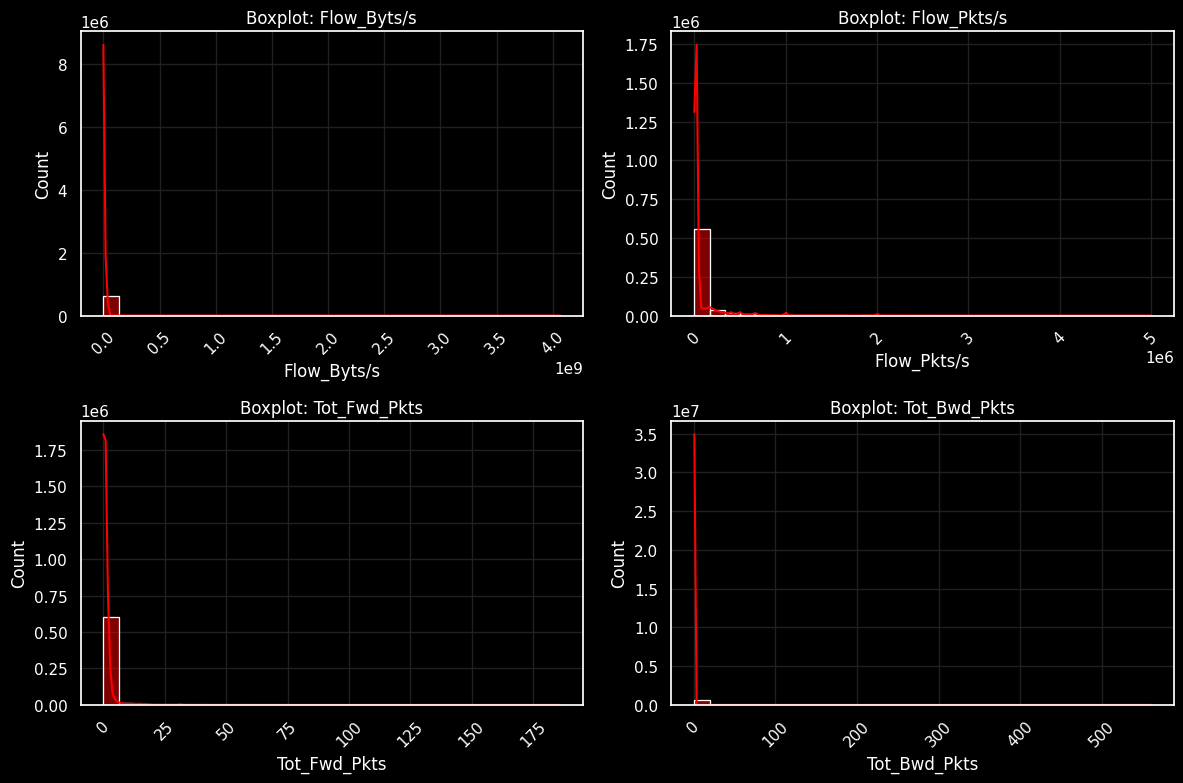

In [22]:
# Transimssion intensity features
col_to_hist = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
plot_histograms(df[col_to_hist])

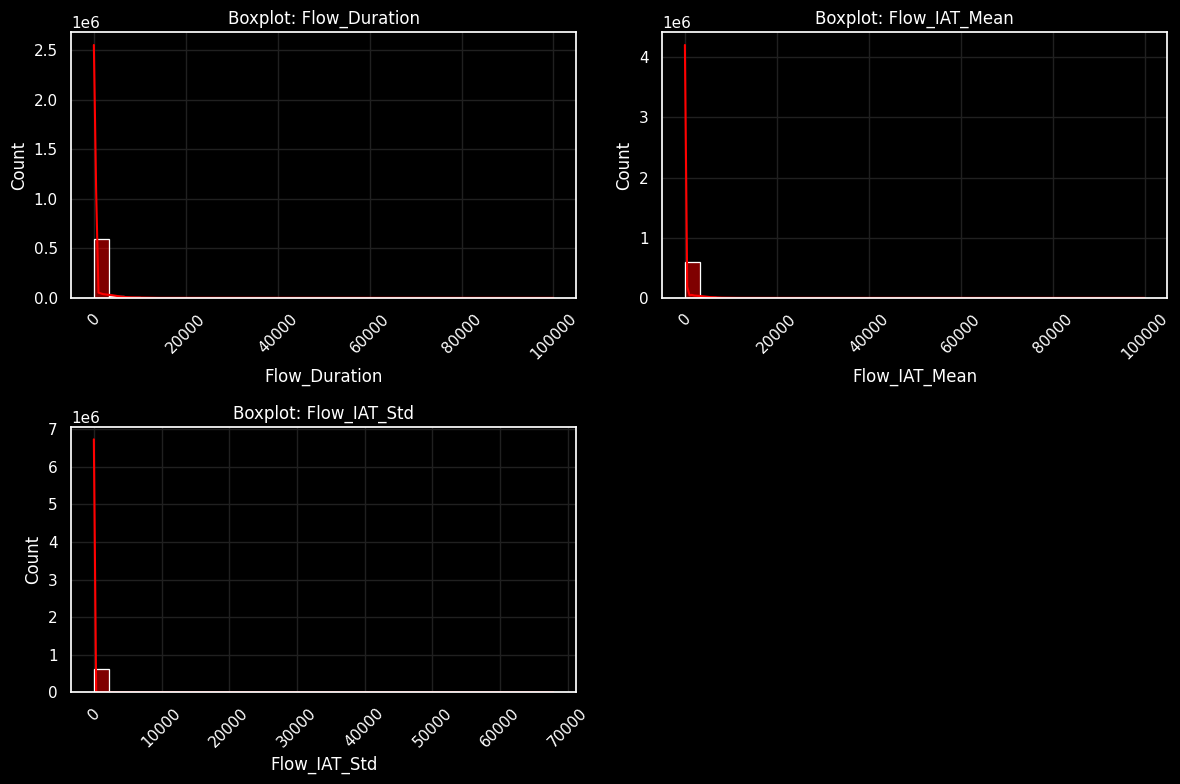

In [23]:
# Transmission regular features
col_to_hist = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
plot_histograms(df[col_to_hist])

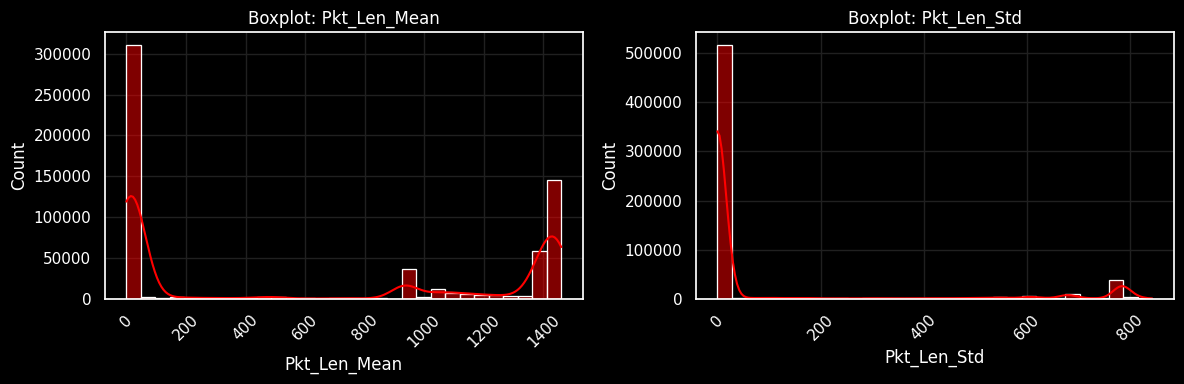

In [24]:
# Transmission packet sizes
col_to_hist = ['Pkt_Len_Mean', 'Pkt_Len_Std']
plot_histograms(df[col_to_hist])

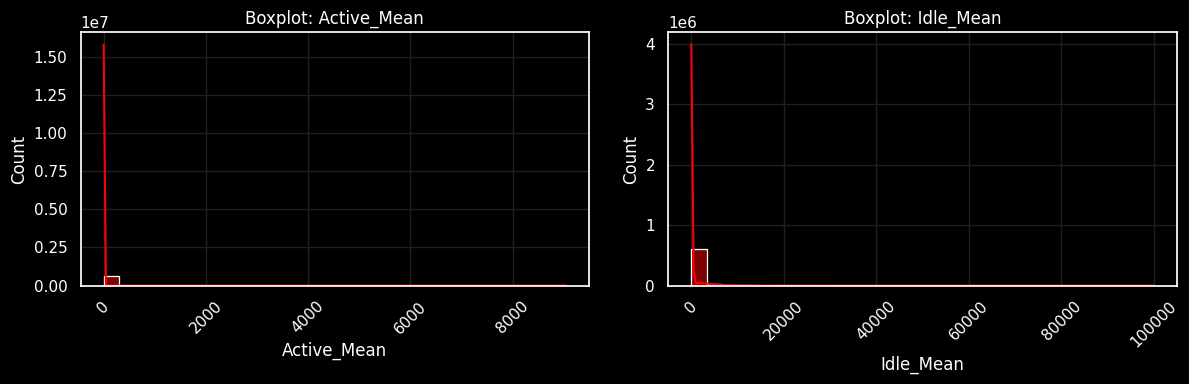

In [25]:
# activity
col_to_hist = ['Active_Mean', 'Idle_Mean']
plot_histograms(df[col_to_hist])

### Results:
* It's basically unreadable. All I can see is a peak on the left, which suggests most of the data is low-value and has some outliers. The graphs are skewed to the right.

### 2.2.2. Logarytmic data plots
* Using logarytmic scale may by more "readable"

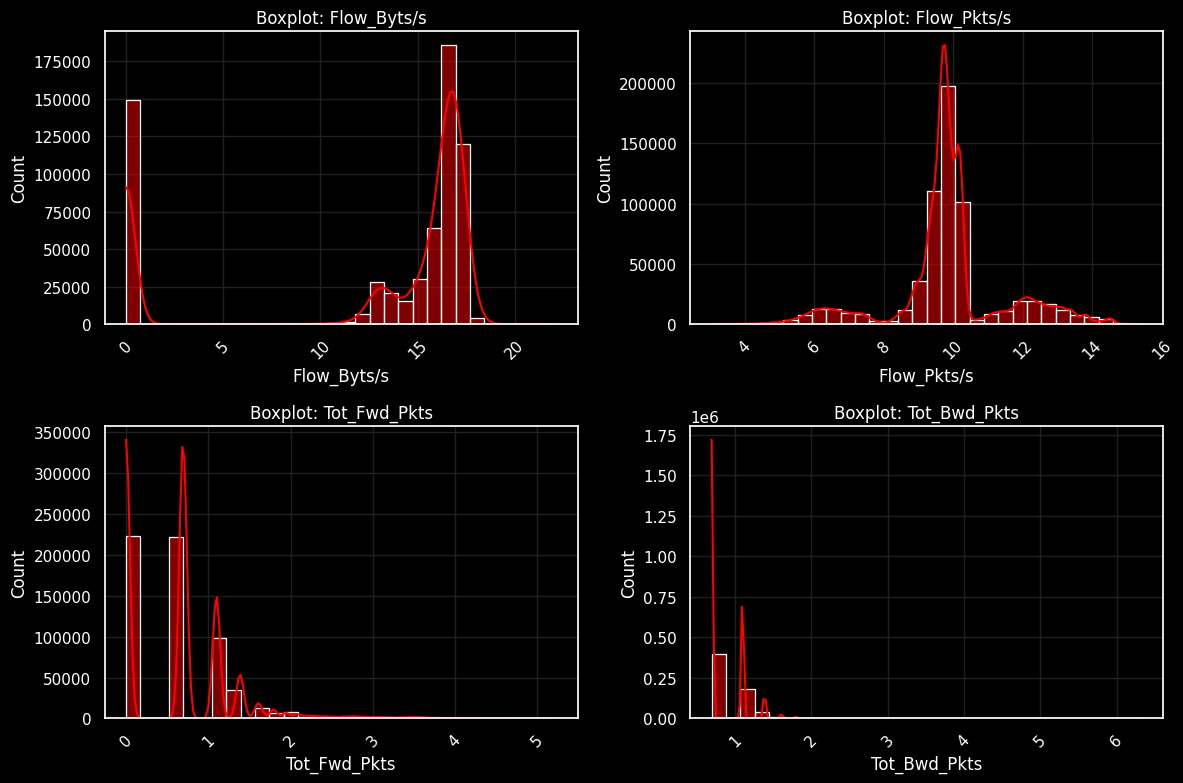

In [26]:
# Transimssion intensity features - log scale
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

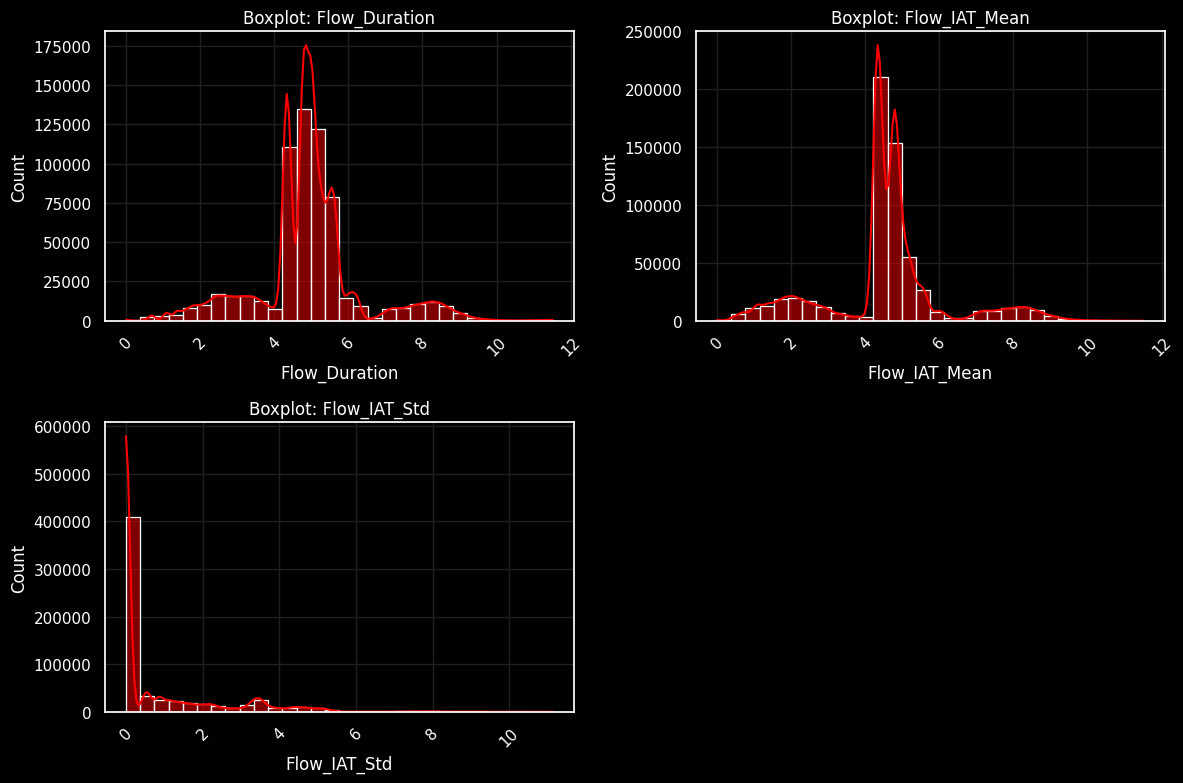

In [27]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


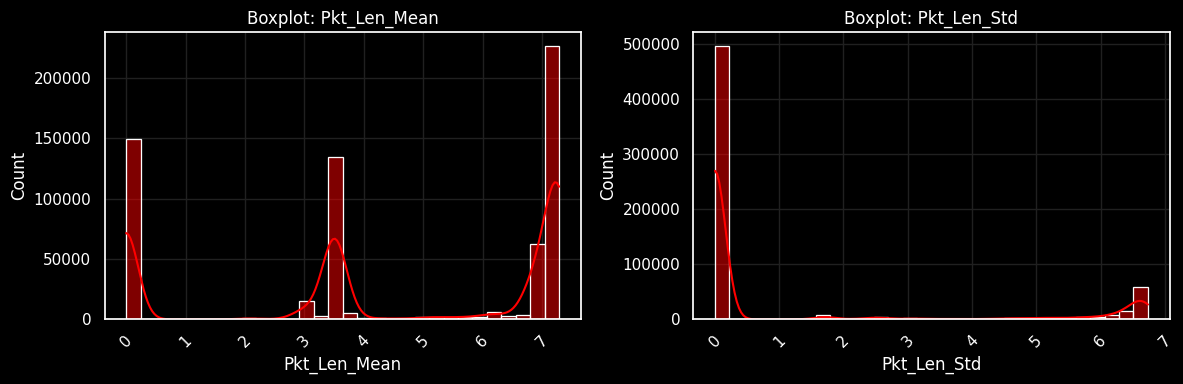

In [28]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

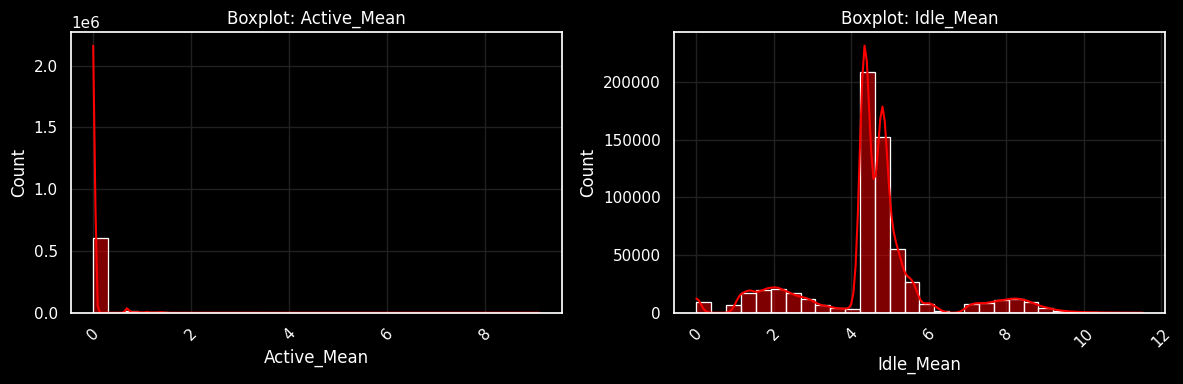

In [29]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


### Results
* Data on a logarithmic scale are more readable. Transformation reveals the structure of the distributions, enabling the identification of different network traffic profiles and outliers corresponding to attacks.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           625783 non-null  int64  
 1   Flow_Duration      625783 non-null  int64  
 2   Tot_Fwd_Pkts       625783 non-null  int64  
 3   Tot_Bwd_Pkts       625783 non-null  int64  
 4   TotLen_Fwd_Pkts    625783 non-null  float64
 5   TotLen_Bwd_Pkts    625783 non-null  float64
 6   Fwd_Pkt_Len_Max    625783 non-null  float64
 7   Fwd_Pkt_Len_Min    625783 non-null  float64
 8   Fwd_Pkt_Len_Mean   625783 non-null  float64
 9   Fwd_Pkt_Len_Std    625783 non-null  float64
 10  Bwd_Pkt_Len_Max    625783 non-null  float64
 11  Bwd_Pkt_Len_Min    625783 non-null  float64
 12  Bwd_Pkt_Len_Mean   625783 non-null  float64
 13  Bwd_Pkt_Len_Std    625783 non-null  float64
 14  Flow_Byts/s        625783 non-null  float64
 15  Flow_Pkts/s        625783 non-null  float64
 16  Fl

### 2.2.3. Boxplots
* Plots to detect outlieres

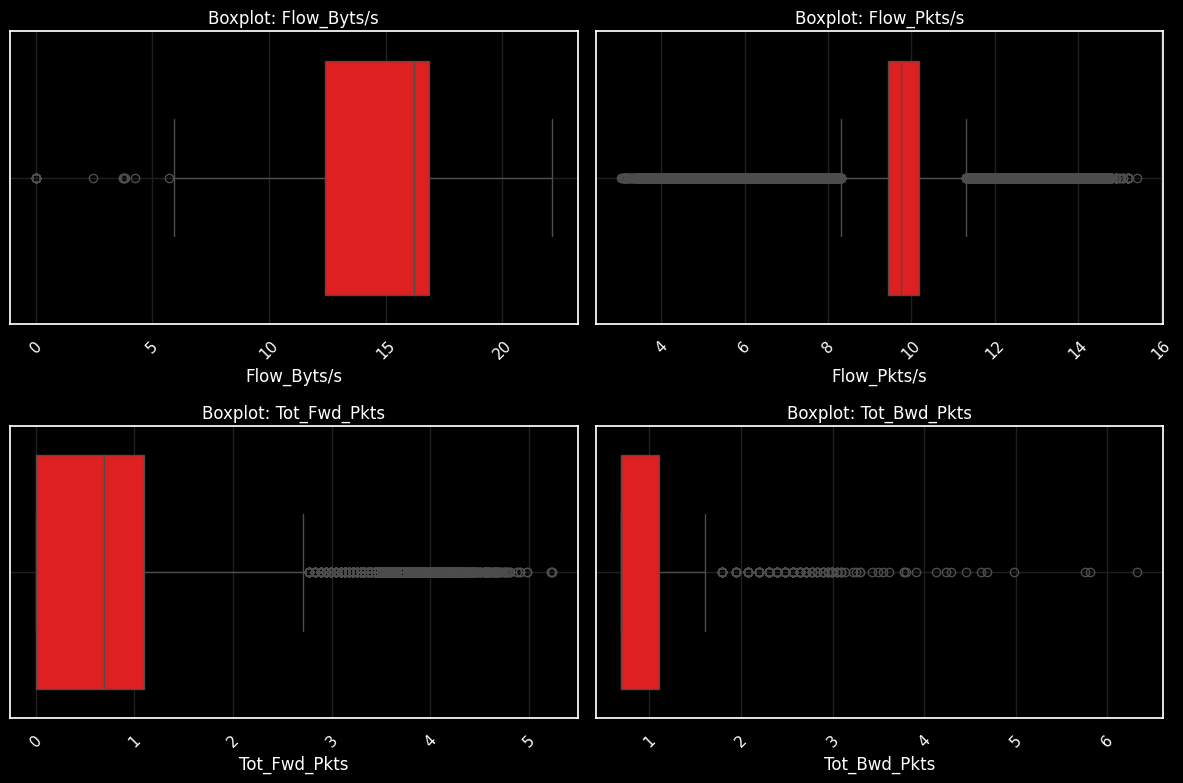

In [31]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)


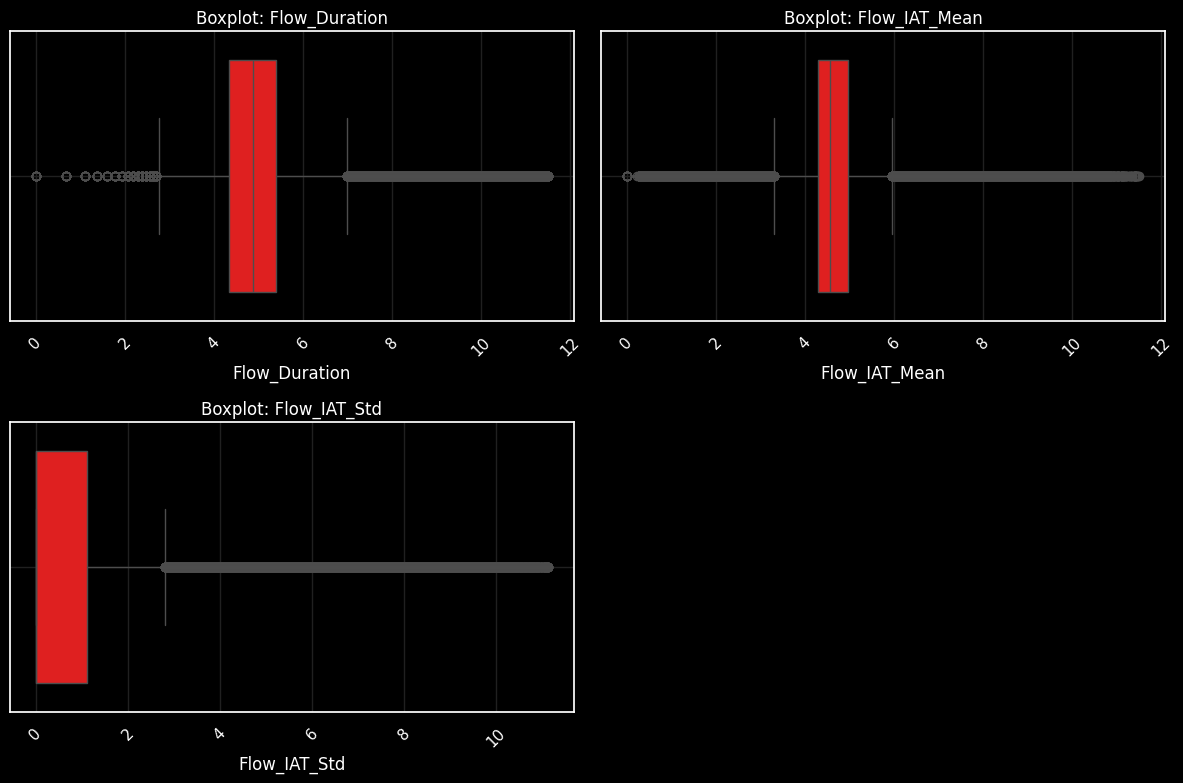

In [32]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

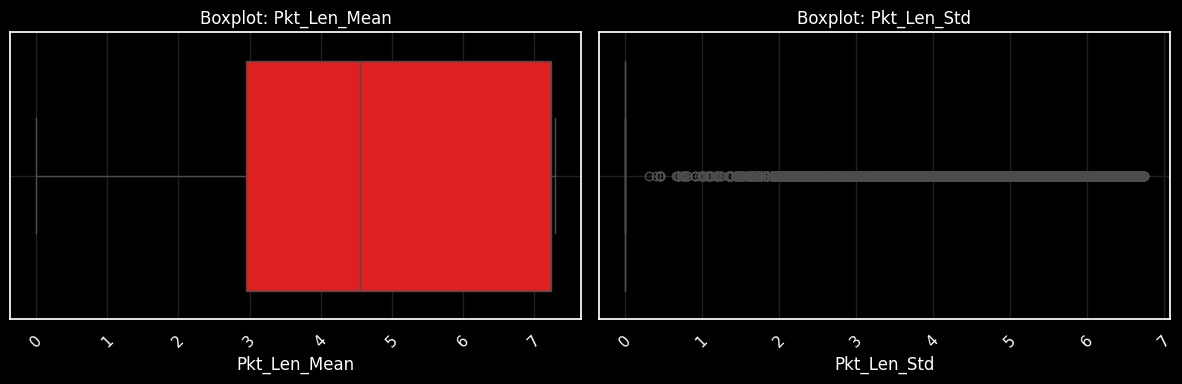

In [33]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

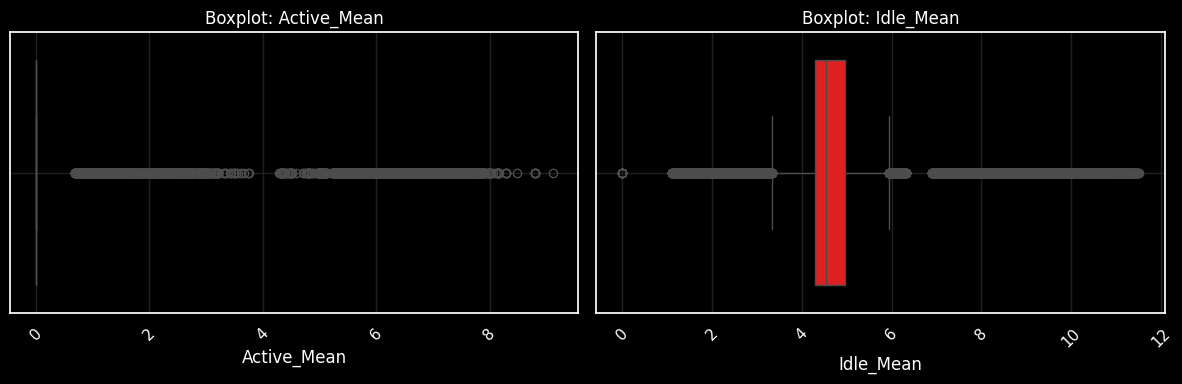

In [34]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

### Results
* Both boxplots and histograms show that the data is highly scattered and contains outliers. I do not discredit or remove data with many outliers. They carry important information and are essential for detecting network attacks.

### 2.2.4. Histograms with Labels
* I am using logaritmic data

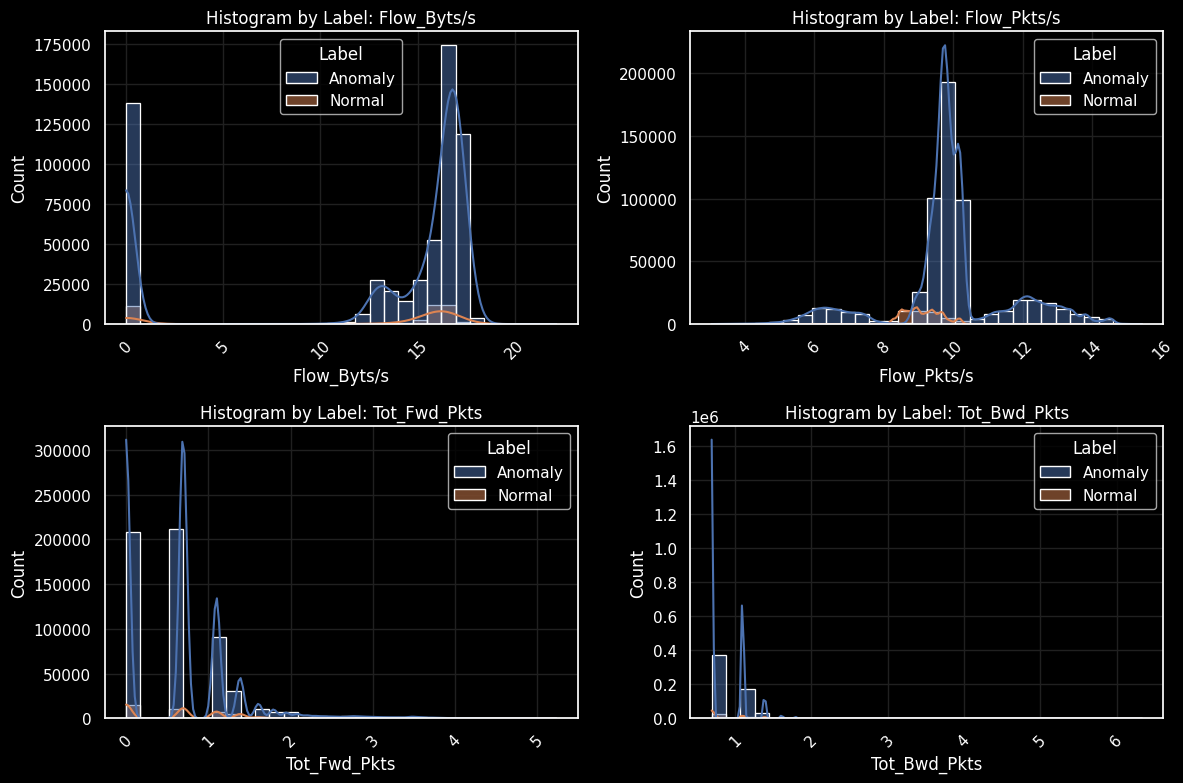

In [35]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

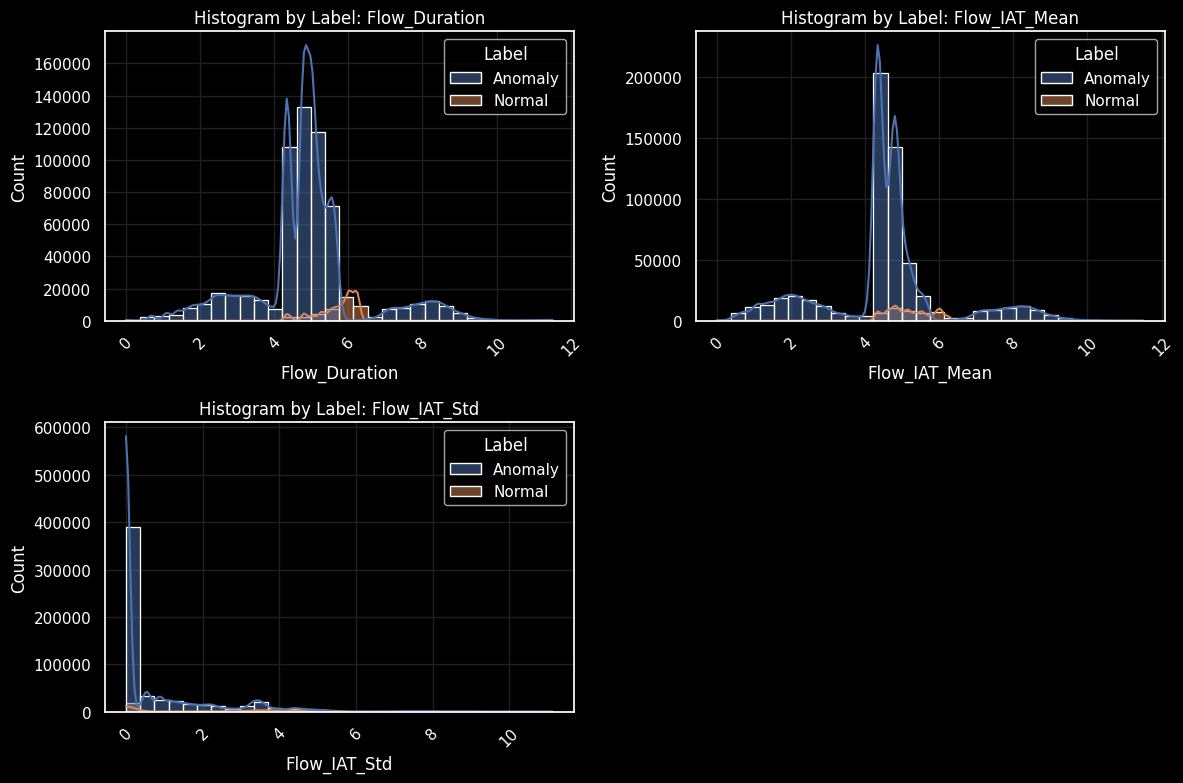

In [36]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

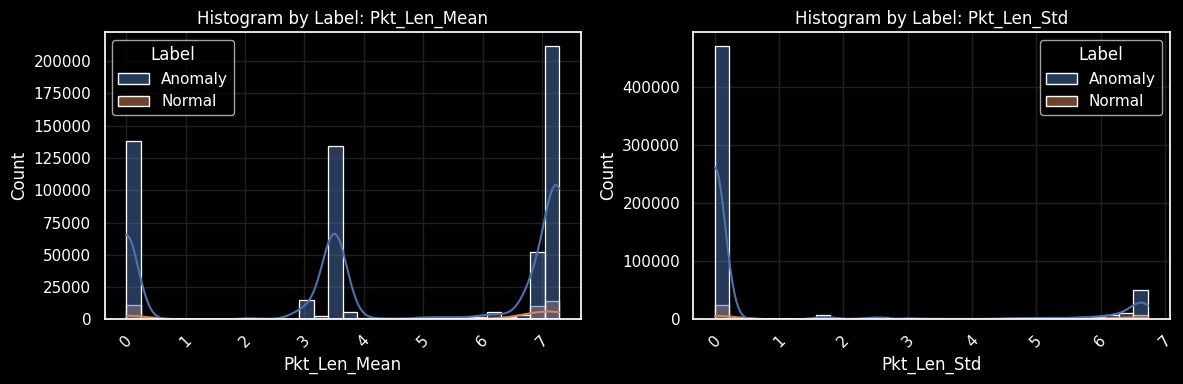

In [37]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

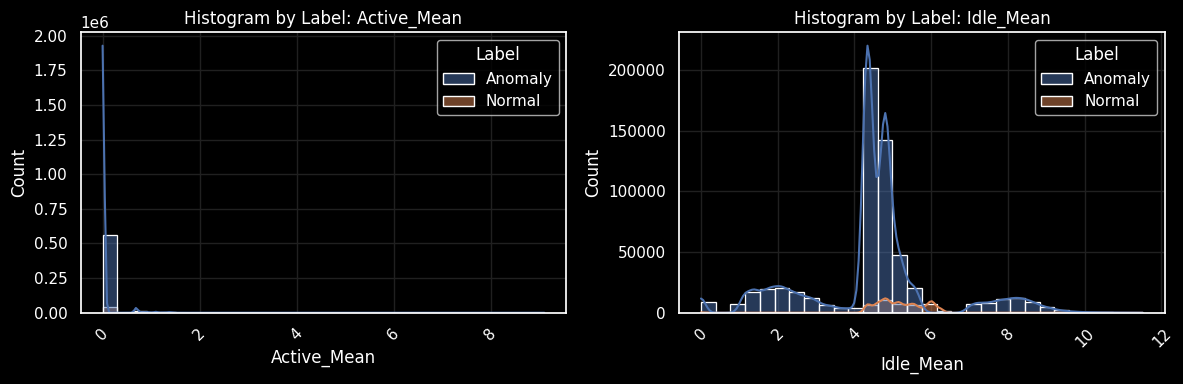

In [38]:
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

### Results
* The largest differences can be seen for the Pkt_Len_Mean variable. Data labeled "normal" have either very large or very small packets. In the case of attacks, packets are very small, medium, or very large.

* For the "Flow Duration" variable, a significant shift to the right of the peak labeled "Normal" is also visible relative to the distribution labeled "Anomaly."

### 2.2.5 Target variable

In [39]:
df["Label"].value_counts(normalize=True)

Label
Anomaly    0.935963
Normal     0.064037
Name: proportion, dtype: float64

<Axes: title={'center': 'Class Distribution of Target Variable'}, xlabel='Label'>

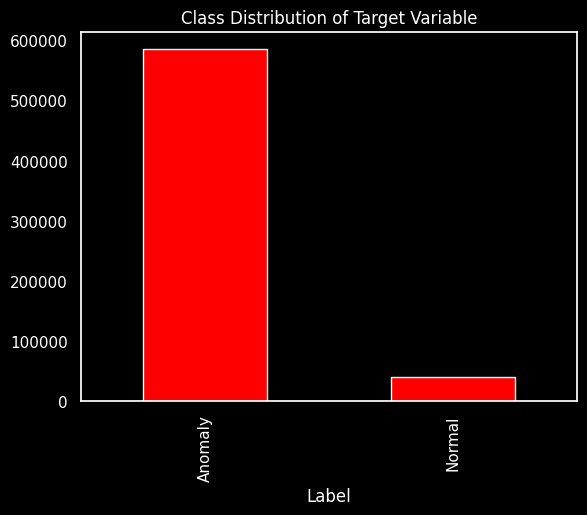

In [40]:
df["Label"].value_counts().plot(kind='bar', color='red', title='Class Distribution of Target Variable')

### Result
* strong imbalance of the target variable around 93:7

## 2.3. Correlations
It adds logarithmized variables, which reveal the structure without distorting the transmitted information. It does not logarithmize time variables because this would distort the transmitted information. For example, a time difference of 10-100 ms is not the same as a time difference of 100-1000 ms.

In [41]:
def plot_corr_heatmap(corr_matrix):
    ''' Plot heatmap of the correlation matrix.
        input: corr_matrix - pandas DataFrame (correlation matrix)
    '''
    plt.figure(figsize=(12, 10))
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, square=True, linewidths=.5)
    plt.title("Correlation Heatmap", color='white')
    plt.show()

Select colums for correlation and create new dataframe

In [42]:
corr_features = [
    # does not exist yet
    'Flow_Pkts/s_log',
    'Flow_Byts/s_log',
    'Flow_Duration_log',
    'Tot_Fwd_Pkts_log',
    'Tot_Bwd_Pkts_log',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Active_Mean',
    'Idle_Mean'
]
df_corr = df[corr_features[5:]].copy()

columns_to_log = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'Flow_Duration']
for col in columns_to_log:
    df_corr[col + "_log"] = np.log1p(df[col])

# result
display(df_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_IAT_Mean      625783 non-null  float64
 1   Flow_IAT_Std       625783 non-null  float64
 2   Pkt_Len_Mean       625783 non-null  float64
 3   Pkt_Len_Std        625783 non-null  float64
 4   Active_Mean        625783 non-null  float64
 5   Idle_Mean          625783 non-null  float64
 6   Flow_Byts/s_log    625783 non-null  float64
 7   Flow_Pkts/s_log    625783 non-null  float64
 8   Tot_Fwd_Pkts_log   625783 non-null  float64
 9   Tot_Bwd_Pkts_log   625783 non-null  float64
 10  Flow_Duration_log  625783 non-null  float64
dtypes: float64(11)
memory usage: 52.5 MB


None

### 2.3.1 Spearman
* Spearman because it is resistant to outliers and supposedly works well on log transforms.


In [43]:
corr_spearman = df_corr.corr(method='spearman')

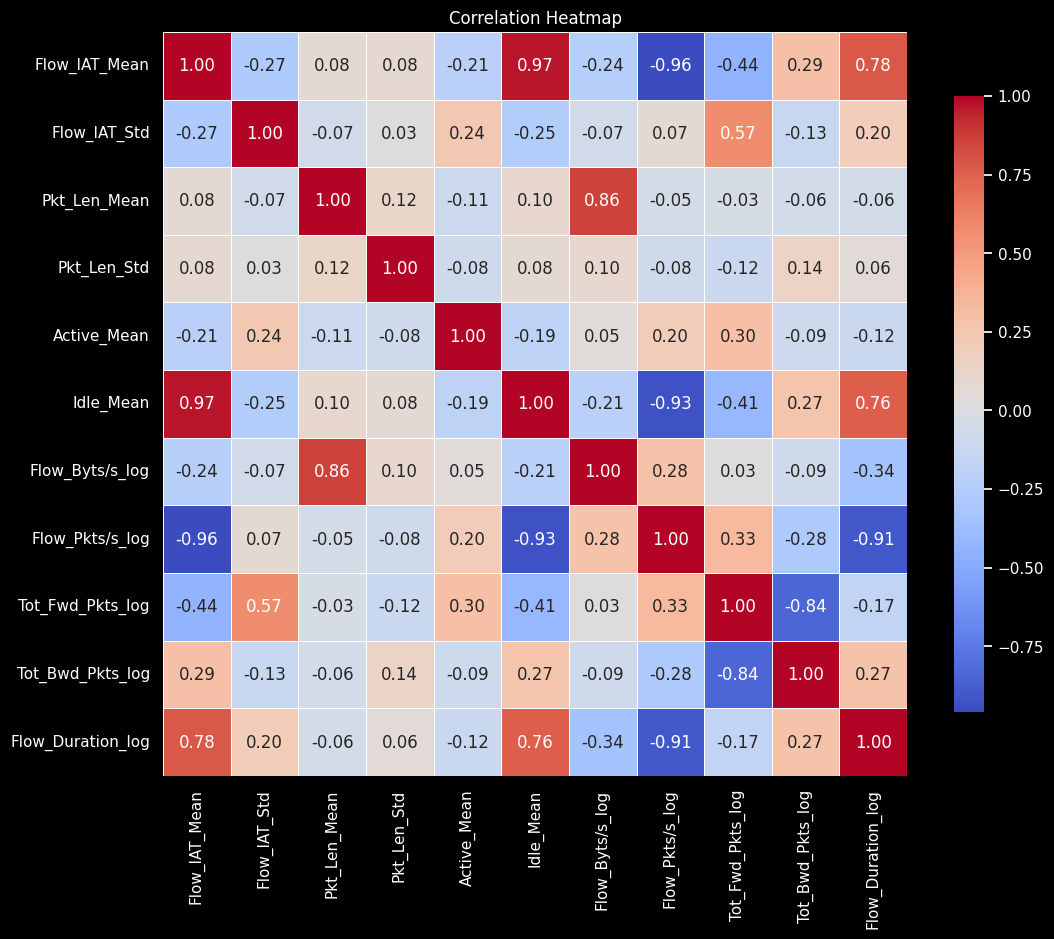

In [44]:
plot_corr_heatmap(corr_spearman)

### Results
- Idle_Mean <-> Flow_IAT_Mean - high correlation, which is logical - the greater the time intervals between successive packets, the higher the idle time. One to discard.
- Flow_Pkts/s_log <-> Flow_IAT_Mean - also logical - the higher the number of packets per second, the lower the device's idle time.
- Flow_Duration <-> Flow_IAT_Mean - high correlation, but I doubt whether these two values ​​are actually dependent on each other!
- Pkt_Len_Mean <-> Flow_Bytes/s_log - the number of bytes in the flow will depend, among other things, on the packet size - possibly Flow Bytes to discard. It may be that a lot of small-sized frames are being sent, which will result in a high Flow_Bytes/s_log value...
- Flow_Bytes/s_log <-> Idle_Mean - the less frequently it sends, the lower the flow.
- Flow_Pkts/s_log <-> Flow_Duration_log - strong correlation, but physically unrelated. I can't really remove this unless I use a linear model...
- Tot_Fwd_Pkts_log <-> Tot_Bwd_Pkts_log - the difference carries valuable information - it's better to replace it with: (fwd_pkts - bwd_pkts)

* Flow_IAT_Mean - remove
* Replace Tot_Fwd_Pkts_log and Tot_Bwd_Pkts_log with: (fwd_pkts - bwd_pkts)

In [45]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_IAT_Mean      625783 non-null  float64
 1   Flow_IAT_Std       625783 non-null  float64
 2   Pkt_Len_Mean       625783 non-null  float64
 3   Pkt_Len_Std        625783 non-null  float64
 4   Active_Mean        625783 non-null  float64
 5   Idle_Mean          625783 non-null  float64
 6   Flow_Byts/s_log    625783 non-null  float64
 7   Flow_Pkts/s_log    625783 non-null  float64
 8   Tot_Fwd_Pkts_log   625783 non-null  float64
 9   Tot_Bwd_Pkts_log   625783 non-null  float64
 10  Flow_Duration_log  625783 non-null  float64
dtypes: float64(11)
memory usage: 52.5 MB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           625783 non-null  int64  
 1   Flow_Duration      625783 non-null  int64  
 2   Tot_Fwd_Pkts       625783 non-null  int64  
 3   Tot_Bwd_Pkts       625783 non-null  int64  
 4   TotLen_Fwd_Pkts    625783 non-null  float64
 5   TotLen_Bwd_Pkts    625783 non-null  float64
 6   Fwd_Pkt_Len_Max    625783 non-null  float64
 7   Fwd_Pkt_Len_Min    625783 non-null  float64
 8   Fwd_Pkt_Len_Mean   625783 non-null  float64
 9   Fwd_Pkt_Len_Std    625783 non-null  float64
 10  Bwd_Pkt_Len_Max    625783 non-null  float64
 11  Bwd_Pkt_Len_Min    625783 non-null  float64
 12  Bwd_Pkt_Len_Mean   625783 non-null  float64
 13  Bwd_Pkt_Len_Std    625783 non-null  float64
 14  Flow_Byts/s        625783 non-null  float64
 15  Flow_Pkts/s        625783 non-null  float64
 16  Fl

### 2.3.2 Pearson
* Detect linear dependence

In [47]:
corr_pearson = df_corr.corr(method='pearson')

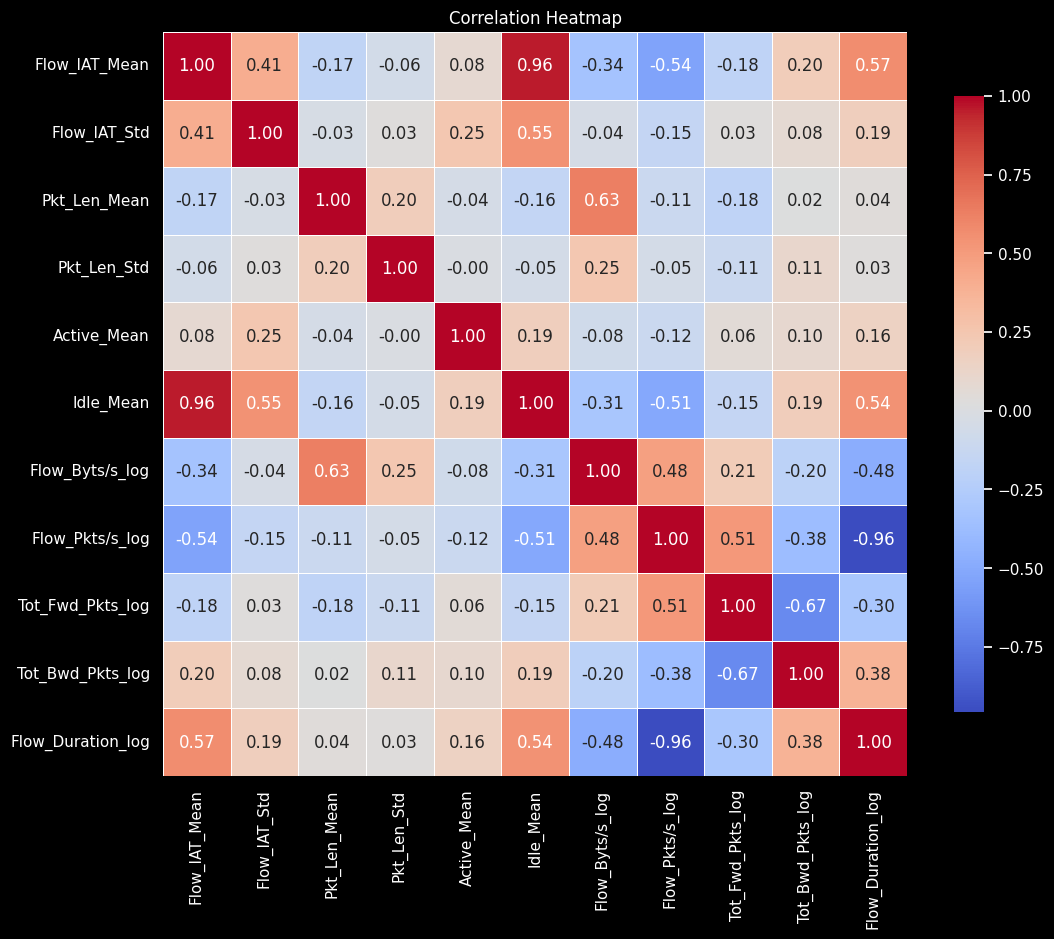

In [48]:
plot_corr_heatmap(corr_pearson)

In [49]:
df['Intensity_Duration_Ratio'] = df_corr['Flow_Pkts/s_log'] / (df_corr['Flow_Duration_log'] + 1e-8) #in case of zero duration
df['Fwd_Bwd_Asymetry'] = (df_corr['Tot_Fwd_Pkts_log'] - df_corr['Tot_Bwd_Pkts_log'])

# Drop Idle Mean and Active_Mean as they are highly correlated with another feature and active mean can be described by other features
# df.drop(columns=['Idle_Mean', 'Active_Mean'], inplace=True)

### Results
* confirms a strong linear relationship between Flow_Duration_Log and Flow_Pkt/s_Log, but they provide different information. For trees it's OK, in linear regression it should be discarded. Idle_Mean should be discarded, strong linear relationship with Flow_IAT_Mean


# 3. Model Training


## 3.1. Logistic Regression - Base Model
* I choose the logistic regression model as the baseline due to its high interpretability. The results will be a reference for subsequent models.

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# models
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    balanced_accuracy_score,
)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


In [51]:
def Pipeline_proceed(X, model):
    ''' Create a preprocessing and modeling pipeline.

        input:  X - pandas DataFrame with features,
                model - sklearn model instance (e.g., LogisticRegression())

        output: sklearn Pipeline object
    '''
    # divide into numeric and categorical features
    num_features = X.select_dtypes(include=['number']).columns
    cat_features = X.select_dtypes(include=['object', 'category']).columns

    # numerical pipeline
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    # categorical pipeline
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features)
    ])

    # combine pipelines
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    return pipe

In [52]:
# def calculate_metrics(y_test, y_proba, y_pred):
#     metrics = {
#         "accuracy": accuracy_score(y_test, y_pred),
#         "precision": precision_score(y_test, y_pred),
#         "recall": recall_score(y_test, y_pred),
#         "f1_score": f1_score(y_test, y_pred),
#         "roc_auc": roc_auc_score(y_test, y_proba),
#         "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred)
#     }
#     metrics_df = pd.DataFrame([metrics])
#     return metrics_df

In [53]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    ''' Train and evaluate the model using the provided training and testing data.

        input:  X_train - pandas DataFrame with training features,
                X_test - pandas DataFrame with testing features,
                y_train - pandas Series with training labels,
                y_test - pandas Series with testing labels,
                model - sklearn model instance (e.g., LogisticRegression())

        output: metrics_df - pandas DataFrame with evaluation metrics,
                conf_matrix - confusion matrix as a 2D numpy array,
                results_df - pandas DataFrame with true labels, predicted labels, and predicted probabilities (if available),
                pipe - trained sklearn Pipeline object
    '''

    # build pipeline
    pipe = Pipeline_proceed(X_train, model)

    # train the model
    pipe.fit(X_train, y_train)

    # make predictions
    y_pred = pipe.predict(X_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)        # not every model has predict_proba method
        results = {
            "y_test": y_test,
            "y_pred": y_pred,
            "y_proba": y_proba
        }
    else:
        results = {
            "y_test": y_test,
            "y_pred": y_pred,
        }
        roc_auc = None

    # evaluate the model
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc,
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred)
    }


    conf_matrix = confusion_matrix(y_test, y_pred)
    metrics_df = pd.DataFrame([metrics])
    results_df = pd.DataFrame(results)
    return metrics_df, conf_matrix, results_df, pipe

In [54]:
def plot_conf_matrix(cm):
    ''' Plot confusion matrix. 
        input: cm - confusion matrix as a 2D numpy array
    '''

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 5))
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Reds', cbar=False, xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix', color='white')
    plt.show()

In [55]:
def conf_matrix_extra_metrics(cm):
    ''' Calculate additional metrics from confusion matrix.'''
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    metrics = {
        "specificity": specificity,
        "npv": npv,
        "fpr": fpr,
        "fnr": fnr
    }
    return metrics

In [56]:
def calc_metrics(y_pred, y_test, y_proba = None):
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
    }
    if y_proba is not None:
        metrics["roc_auc"] = roc_auc_score(y_test, y_proba)

    metrics["balanced_accuracy_score"] = balanced_accuracy_score(y_test, y_pred)
    
    return pd.DataFrame([metrics])

Encode target variable to binary values
* Anomaly   - 1
* Normal    - 0

In [57]:
df['Label_bin']= df['Label'].apply(lambda x: 0 if x=='Normal' else 1)
display(df[["Label", "Label_bin"]].head(10))
display(df['Label_bin'].dtype)

Label  Label_bin
0  Anomaly          1
1  Anomaly          1
2  Anomaly          1
3  Anomaly          1
4  Anomaly          1
5  Anomaly          1
6  Anomaly          1
7  Anomaly          1
8  Anomaly          1
9  Anomaly          1

dtype('int64')

No Pearson pairs with high correlation. I want to start with a very limited set of baseline features that make sense in the context of IoT network traffic analysis.

In [58]:


features_baseline = [
    'Flow_Pkts/s',
    'Flow_Byts/s',
    'Flow_IAT_Mean',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio',
]

In [59]:
df_baseline = pd.DataFrame()
for col in features_baseline:
    df_baseline[col] = df[col]

In [60]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s               625783 non-null  float64
 1   Flow_Byts/s               625783 non-null  float64
 2   Flow_IAT_Mean             625783 non-null  float64
 3   Pkt_Len_Mean              625783 non-null  float64
 4   Pkt_Len_Std               625783 non-null  float64
 5   Fwd_Bwd_Asymetry          625783 non-null  float64
 6   Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(7)
memory usage: 33.4 MB


Split dataset 80% training / 20% testing. stratify for not balanced target variable

In [61]:
X = df_baseline
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify musi być bo target jest irregular!!!!

Simple Logistic Regression model

In [62]:
lr_model = LogisticRegression(class_weight='balanced',
                              random_state=42, 
                              max_iter=1000)

In [63]:
metrics, conf_matrix, outputs, pipe = train_and_evaluate(X_train, X_test, y_train, y_test, lr_model)
metrics.index = ['LR Baseline']
finalTable = metrics
display(finalTable)
display(conf_matrix)

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline  0.762906   0.987287  0.756424  0.856573  0.900184   

             balanced_accuracy_score  
LR Baseline                 0.807033

array([[ 6874,  1141],
       [28533, 88609]])

### Confusion Matrix Result

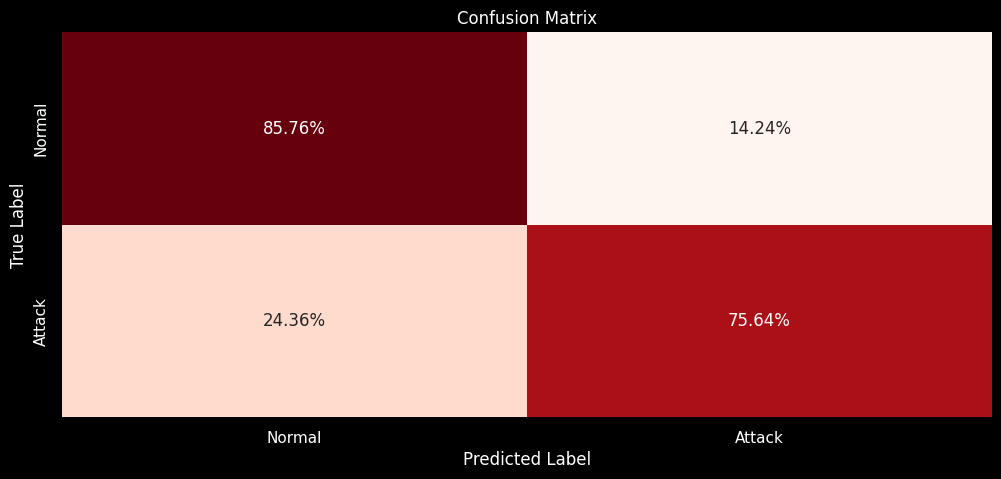

In [64]:
plot_conf_matrix(conf_matrix)

### ROC - CURVE

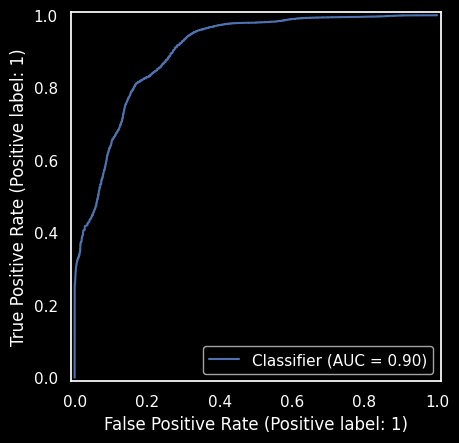

In [65]:
RocCurveDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])         # ROC Curve

If the line is like a linear function, the regression result is random. In this case, we can see that the model is actually making a decision. Y - probability of detecting a positive class (Anomaly), X - probability of classifying a negative class as positive - RECALL / TPR

### Recall - Curve

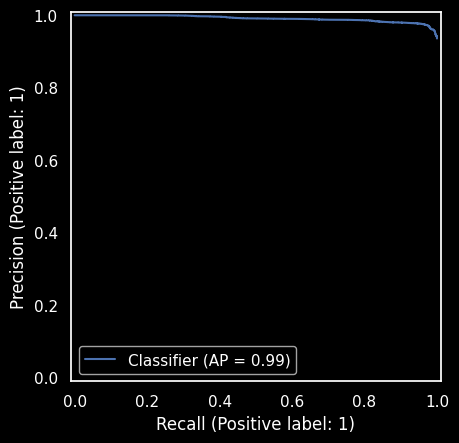

In [66]:
PrecisionRecallDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])  # Precision Curve


X-axis (Recall) – Sensitivity, i.e., what percentage of real attacks (class 1) the model correctly detects.

Y-axis (Precision) – Accuracy, i.e., what percentage of attacks detected by the model actually are attacks.

### Variable significance

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_coefficients(frame, col_name = 'coefficient'):

# globalny styl (u Ciebie już pewnie jest wcześniej)
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })

    # sns.set_style("whitegrid")  # tylko grid, kolory bierzemy z rcParams

    N = frame.shape[0]
    plot_df = frame.head(N).copy()

    plot_df['sign'] = plot_df[col_name].apply(
        lambda x: 'Positive' if x > 0 else 'Negative'
    )

    plt.figure(figsize=(8, 3 * round(len(frame)/6)))
    ax = sns.barplot(
        data=plot_df,
        x=col_name,
        y='feature',
        hue='sign',
        dodge=False,
        palette={
            'Positive': '#00ff00',  # zielony, czytelny na czarnym
            'Negative': '#ff0000'    # czerwony, czytelny na czarnym
        }
    )

    # linia x=0
    ax.axvline(0, color='white', linewidth=1)

    # grid tylko na osi X
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    # poprawka kolorów spine'ów
    for spine in ax.spines.values():
        spine.set_color('white')

    ax.set_xlabel(col_name)
    ax.set_ylabel('Variable')
    ax.set_title(f'Top {N} coefs of lr model')


    plt.tight_layout()
    plt.show()


In [68]:
# get model
reg_model = pipe.named_steps['model']

# get cols
feature_names = pipe.named_steps['preprocessing'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': reg_model.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df

feature  coefficient   abs_coef
0               Flow_Pkts/s    45.861445  45.861445
2             Flow_IAT_Mean     6.961690   6.961690
1               Flow_Byts/s     1.865421   1.865421
3              Pkt_Len_Mean    -0.600298   0.600298
4               Pkt_Len_Std    -0.328025   0.328025
5          Fwd_Bwd_Asymetry     0.114868   0.114868
6  Intensity_Duration_Ratio    -0.059184   0.059184

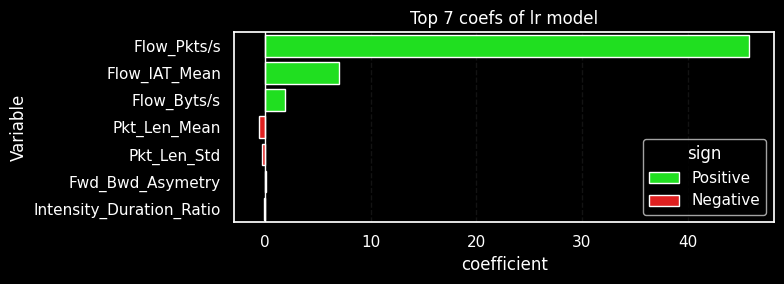

In [69]:
plot_model_coefficients(coef_df)

In [70]:
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
display(coef_df)

feature  coefficient   abs_coef    odds_ratio
0               Flow_Pkts/s    45.861445  45.861445  8.267464e+19
2             Flow_IAT_Mean     6.961690   6.961690  1.055416e+03
1               Flow_Byts/s     1.865421   1.865421  6.458652e+00
3              Pkt_Len_Mean    -0.600298   0.600298  5.486479e-01
4               Pkt_Len_Std    -0.328025   0.328025  7.203449e-01
5          Fwd_Bwd_Asymetry     0.114868   0.114868  1.121726e+00
6  Intensity_Duration_Ratio    -0.059184   0.059184  9.425337e-01

### Results
**Odds Ratio** is definetly too big. In that case model can decide about the attack traffic basing only on the first variable. It should reduced somehow.

# 3.1.1. Logistic Regression with logharytmic data

In [71]:
# same as previously
df['Label_bin']= df['Label'].apply(lambda x: 0 if x=='Normal' else 1)
display(df[["Label", "Label_bin"]].head(10))
display(df['Label_bin'].dtype)

Label  Label_bin
0  Anomaly          1
1  Anomaly          1
2  Anomaly          1
3  Anomaly          1
4  Anomaly          1
5  Anomaly          1
6  Anomaly          1
7  Anomaly          1
8  Anomaly          1
9  Anomaly          1

dtype('int64')

In [72]:
# same as prevoiously, but replaced some data with log versions

features_lr_log = [
    'Flow_Pkts/s_log',
    'Flow_Byts/s_log',
    'Flow_IAT_Mean',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio',
]

In [73]:
df_lr_log = df_corr[['Flow_Pkts/s_log', 'Flow_Byts/s_log']].copy()

In [74]:
for col in features_lr_log[2:]:
    df_lr_log[col] = df[col]

In [75]:
df_lr_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s_log           625783 non-null  float64
 1   Flow_Byts/s_log           625783 non-null  float64
 2   Flow_IAT_Mean             625783 non-null  float64
 3   Pkt_Len_Mean              625783 non-null  float64
 4   Pkt_Len_Std               625783 non-null  float64
 5   Fwd_Bwd_Asymetry          625783 non-null  float64
 6   Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(7)
memory usage: 33.4 MB


In [76]:
X = df_lr_log
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify musi być bo target jest irregular!!!!

In [77]:
lr_log_model = LogisticRegression(class_weight='balanced',
                                random_state=42, 
                                max_iter=1000,
                                n_jobs=-1)

In [78]:
metrics, conf_matrix, outputs, pipe = train_and_evaluate(X_train, X_test, y_train, y_test, lr_log_model)
metrics.index = ['LR log']

finalTable = pd.concat([finalTable, metrics])
display(finalTable)
display(conf_matrix)

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline  0.762906   0.987287  0.756424  0.856573  0.900184   
LR log       0.803543   0.987732  0.800038  0.884032  0.917760   

             balanced_accuracy_score  
LR Baseline                 0.807033  
LR log                      0.827405

array([[ 6851,  1164],
       [23424, 93718]])

### Results:
* The most important observation is the increase in recall from 0.756 to 0.800, which means that the model with logarithmic transformation is more effective in detecting real cases of network attacks. Slightly worse in Normal traffic detecting

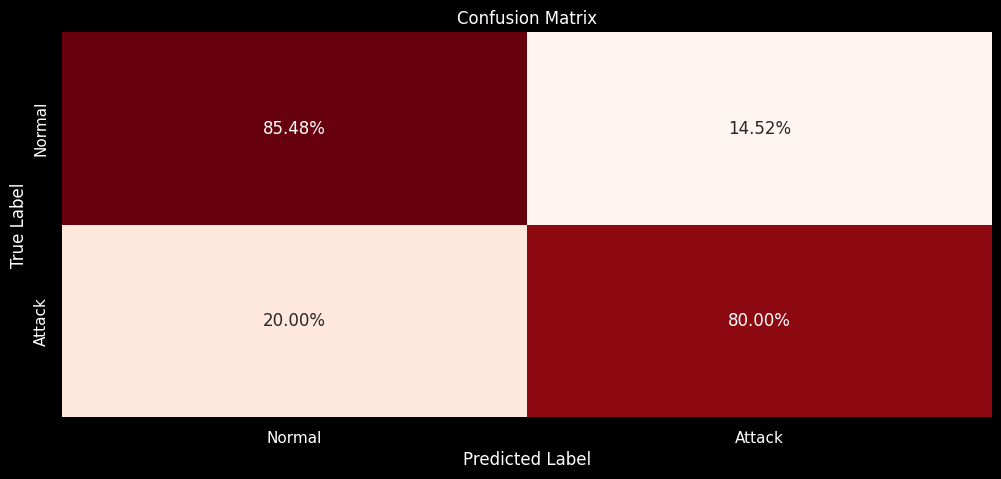

In [79]:
plot_conf_matrix(conf_matrix)

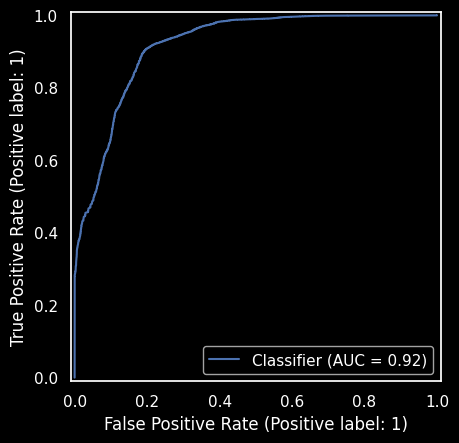

In [80]:
RocCurveDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])         # ROC Curve

Higher ROC AUC, lower linearity than in baseline

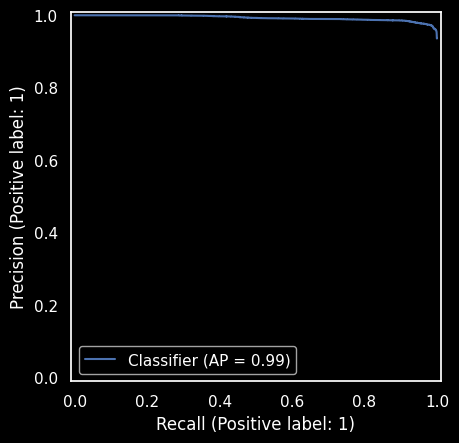

In [81]:
PrecisionRecallDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])  # Precision Curve

same as previously

Measure of which variables had the greatest influence in the model

In [82]:
# get model
log_reg = pipe.named_steps['model']

# get cols
feature_names = pipe.named_steps['preprocessing'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': log_reg.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df

feature  coefficient   abs_coef
2             Flow_IAT_Mean    26.362259  26.362259
0           Flow_Pkts/s_log     9.000027   9.000027
1           Flow_Byts/s_log     1.355741   1.355741
3              Pkt_Len_Mean    -0.895138   0.895138
4               Pkt_Len_Std    -0.617367   0.617367
6  Intensity_Duration_Ratio     0.218531   0.218531
5          Fwd_Bwd_Asymetry     0.050171   0.050171

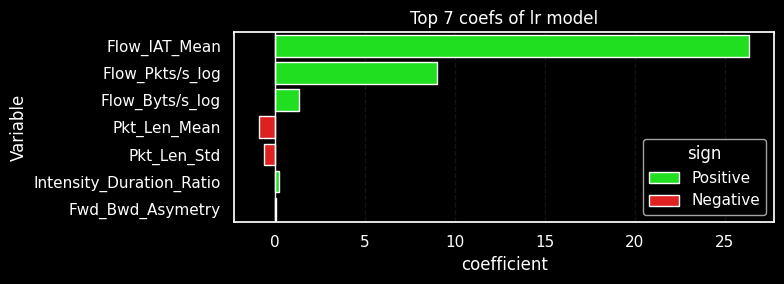

In [83]:
plot_model_coefficients(coef_df)

In [84]:
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
display(coef_df)

feature  coefficient   abs_coef    odds_ratio
2             Flow_IAT_Mean    26.362259  26.362259  2.811795e+11
0           Flow_Pkts/s_log     9.000027   9.000027  8.103301e+03
1           Flow_Byts/s_log     1.355741   1.355741  3.879636e+00
3              Pkt_Len_Mean    -0.895138   0.895138  4.085512e-01
4               Pkt_Len_Std    -0.617367   0.617367  5.393629e-01
6  Intensity_Duration_Ratio     0.218531   0.218531  1.244247e+00
5          Fwd_Bwd_Asymetry     0.050171   0.050171  1.051451e+00

The odds_ratio value for Flow_Pkt/s is absurdly high. Does this mean that the model can essentially make decisions based on a single variable? The results are supposedly OK, but that's disastrous in this case because it's not the only variable that affects the accuracy of the result!!!! It's better than the baseline by 6 orders of magnitude.

The Flow_IAT_Mean variable had the strongest influence on the model, the Fwd_bwd_Asymetry variable had the smallest influence - to be considered or can it be omitted?

odds_ratio = 2.5
→ wzrost cechy o 1 std = 2.5× większa szansa Anomaly

idelne jak jest punkt 1,1. Oś Y (Precision): Jaka część przewidywań pozytywnych była trafna? Oś X (Recall): Ile ze wszystkich pozytywnych przypadków udało się wykryć?

## 3.1.2. Random Search

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from joblib import dump, load

In [86]:
param_dist = {
    'C': loguniform(1e-4, 1e2),   # log-scale
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

In [87]:
lr = LogisticRegression(
    solver='saga',
    class_weight='balanced',
    max_iter=2000,
    random_state=42,
    n_jobs=-1
)

In [88]:
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [89]:
# random_search.fit(X_train, y_train)

In [90]:
# dump(random_search, "lr_random_search.joblib")

In [91]:
lr_search = load("lr_random_search.joblib")

In [92]:
best_lr = lr_search.best_estimator_
best_lr

LogisticRegression(C=np.float64(0.5068612120448913), class_weight='balanced',
                   l1_ratio=0.25, max_iter=2000, n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga')

In [93]:
metrics, conf_matrix, outputs, pipe = train_and_evaluate(X_train, X_test, y_train, y_test, best_lr)
metrics.index = ['LR tuned log']

finalTable = pd.concat([finalTable, metrics])
display(finalTable)
display(conf_matrix)

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1152: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l2 with l1_ratio=0.25. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline   0.762906   0.987287  0.756424  0.856573  0.900184   
LR log        0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log  0.802784   0.987730  0.799218  0.883531  0.917640   

              balanced_accuracy_score  
LR Baseline                  0.807033  
LR log                       0.827405  
LR tuned log                 0.827058

array([[ 6852,  1163],
       [23520, 93622]])

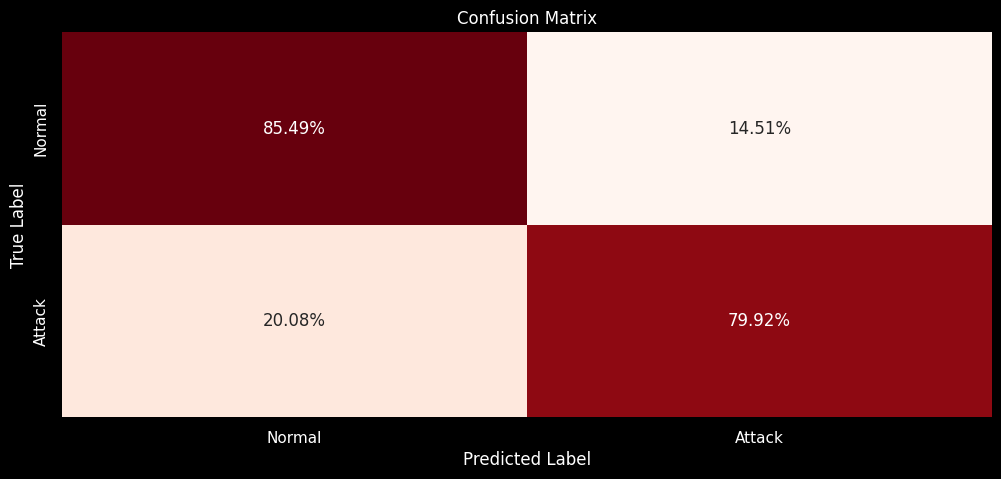

In [94]:
plot_conf_matrix(conf_matrix)

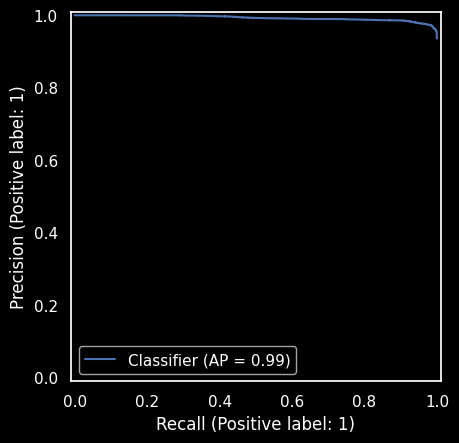

In [95]:
PrecisionRecallDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])  # Precision Curve


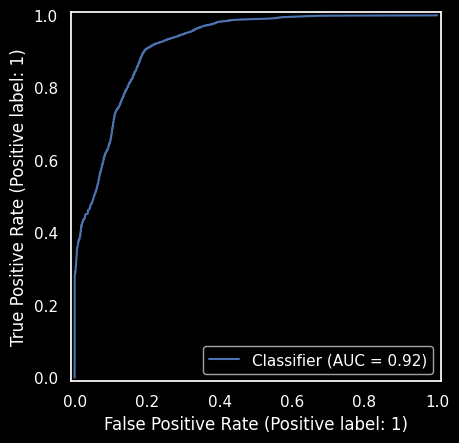

In [96]:
RocCurveDisplay.from_predictions(outputs["y_test"], outputs["y_proba"])         # ROC Curve


In [97]:
# get model
log_reg = pipe.named_steps['model']

# get cols
feature_names = pipe.named_steps['preprocessing'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': log_reg.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df


feature  coefficient   abs_coef
2             Flow_IAT_Mean    25.833147  25.833147
0           Flow_Pkts/s_log     8.886138   8.886138
1           Flow_Byts/s_log     1.352249   1.352249
3              Pkt_Len_Mean    -0.897214   0.897214
4               Pkt_Len_Std    -0.616663   0.616663
6  Intensity_Duration_Ratio    -0.113429   0.113429
5          Fwd_Bwd_Asymetry     0.045855   0.045855

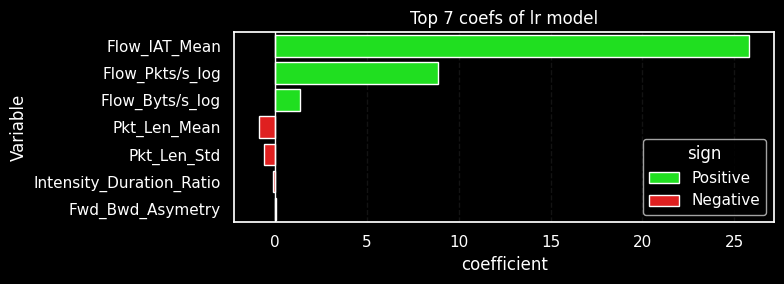

In [98]:
plot_model_coefficients(coef_df)


In [99]:
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
display(coef_df)

feature  coefficient   abs_coef    odds_ratio
2             Flow_IAT_Mean    25.833147  25.833147  1.656506e+11
0           Flow_Pkts/s_log     8.886138   8.886138  7.231042e+03
1           Flow_Byts/s_log     1.352249   1.352249  3.866111e+00
3              Pkt_Len_Mean    -0.897214   0.897214  4.077041e-01
4               Pkt_Len_Std    -0.616663   0.616663  5.397424e-01
6  Intensity_Duration_Ratio    -0.113429   0.113429  8.927671e-01
5          Fwd_Bwd_Asymetry     0.045855   0.045855  1.046923e+00

### Results:
The results after random search are slightly worse than in the previous case. This is due to folds, or rather their absence, in the case of logistic regression with logarithms. If I had changed the random seed, the results would likely have been different. I believe this is also due to the overwhelming dominance of one variable – in fact, the model depends solely on it. What happens if I remove it? I'll check it out!

## 3.1.3. Linear Logist treshold tuninng

In [100]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# OUTPUTS from the last model - best_lr from random search

thresholds = np.arange(0.1, 0.9, 0.05)

results_tr = []

for t in thresholds:
    y_pred_t = (outputs["y_proba"] >= t).astype(int)
    results_tr.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results_tr)
threshold_df

threshold  precision    recall        f1  balanced_accuracy_score
0        0.10   0.962171  0.994434  0.978036                 0.711503
1        0.15   0.967361  0.989261  0.978188                 0.750713
2        0.20   0.973412  0.979794  0.976592                 0.794326
3        0.25   0.976507  0.964086  0.970257                 0.812548
4        0.30   0.978771  0.948148  0.963216                 0.823793
5        0.35   0.982053  0.930503  0.955583                 0.840985
6        0.40   0.985210  0.908146  0.945110                 0.854447
7        0.45   0.986402  0.856405  0.916818                 0.841927
8        0.50   0.987730  0.799218  0.883531                 0.827058
9        0.55   0.988556  0.763253  0.861416                 0.817060
10       0.60   0.989658  0.718060  0.832261                 0.804195
11       0.65   0.989766  0.662965  0.794055                 0.781389
12       0.70   0.990084  0.636723  0.775026                 0.771761
13       0.75   0.990814  0.614186  0.758311                 0.765484
14       0.80   0.991652  0.557716  0.713917                 0.744547
15       0.85   0.992827  0.492693  0.658569                 0.720333

compromise between class recalls

In [101]:
threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax()]

threshold                  0.400000
precision                  0.985210
recall                     0.908146
f1                         0.945110
balanced_accuracy_score    0.854447
Name: 6, dtype: float64

In [102]:
best_t = threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax(), 'threshold']

y_pred_best = (outputs["y_proba"] >= best_t).astype(int)
conf_matrix_best = confusion_matrix(outputs['y_test'], y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(outputs['y_test'], y_pred_best),
        "precision": precision_score(outputs['y_test'], y_pred_best),
        "recall": recall_score(outputs['y_test'], y_pred_best),
        "f1_score": f1_score(outputs['y_test'], y_pred_best),
        "roc_auc" : roc_auc_score(outputs['y_test'], outputs['y_proba']),
        "balanced_accuracy_score": balanced_accuracy_score(outputs['y_test'], y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
metric_pd.index = ['LR tuned log t = {:.2f}'.format(best_t)]

finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6418,   1597],
       [ 10760, 106382]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447

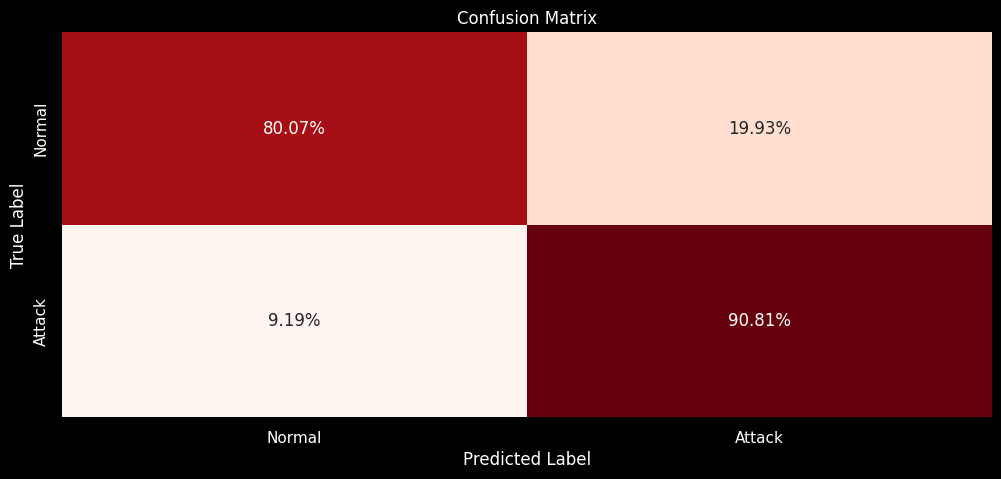

In [103]:
plot_conf_matrix(conf_matrix_best)

In [104]:
best_t = 0.2    # I choose it manually - optimizing recall would cause too much balance accuracy

y_pred_best = (outputs["y_proba"] >= best_t).astype(int)
conf_matrix_best = confusion_matrix(outputs['y_test'], y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(outputs['y_test'], y_pred_best),
        "precision": precision_score(outputs['y_test'], y_pred_best),
        "recall": recall_score(outputs['y_test'], y_pred_best),
        "f1_score": f1_score(outputs['y_test'], y_pred_best),
        "roc_auc" : roc_auc_score(outputs['y_test'], outputs['y_proba']),
        "balanced_accuracy_score": balanced_accuracy_score(outputs['y_test'], y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
metric_pd.index = ['LR tuned log t = {:.2f}'.format(best_t)]

finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  4880,   3135],
       [  2367, 114775]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326

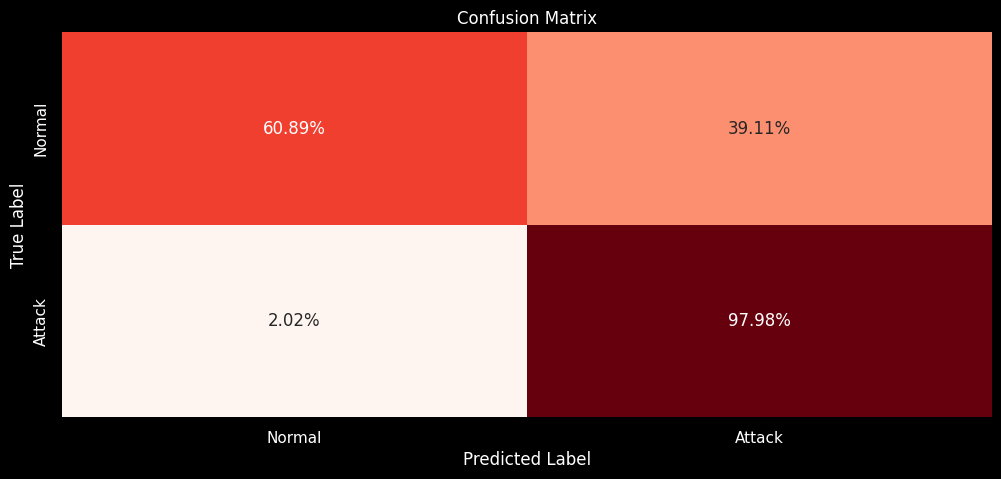

In [105]:
plot_conf_matrix(conf_matrix_best)

## Results:
Best treshold is 0.4 - optimized for highest balanced accuracy. optimizing recall would give me a result of 99% correct attack detection but 50% of normal traffic would be also classified as attack. It can not work like that in the network.

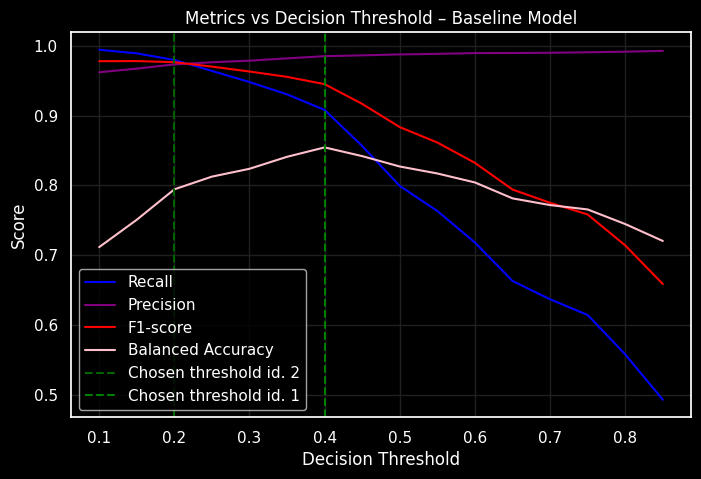

In [106]:
plt.figure(figsize=(8, 5))
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1-score', color = 'red')
plt.plot(threshold_df['threshold'], threshold_df['balanced_accuracy_score'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.2, linestyle='--', color='darkgreen', label='Chosen threshold id. 2')
plt.axvline(x=threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax(), 'threshold'], linestyle='--', color='green', label='Chosen threshold id. 1')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

In [107]:
display(finalTable)

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326

### 3.1.4 Logistic Regression Results
* In this chapter best model is **Best_LR_with_optimized_balanced_accuracy**. It brings the best balance between correct detected "Anomaly" traffic and correct detected "Normal" traffic.
* Choosing model with different treshold cause classifying to many records in "Normal" class as "Anomaly" - unacceptable
* logarithmization of some variables may yield better metrics
* this model favors one variable, in reality it is not the only factor that determines whether it is a network attack. I don't like this model.

## 3.2. Random Forest

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import shap

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3.2.1. Random Forest - baseline

In [109]:
# More Features for Random Forest | Using all features may lead to overfitting | no log transformations
features_rf = [
    'Flow_Pkts/s',
    'Flow_Byts/s',
    'Flow_Duration',
    'Tot_Fwd_Pkts',
    'Tot_Bwd_Pkts',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',

    'Pkt_Len_Mean',
    'Pkt_Len_Std',

    'Active_Mean',
    'Idle_Mean',

    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio'
]
df_rf = df[features_rf].copy()
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s               625783 non-null  float64
 1   Flow_Byts/s               625783 non-null  float64
 2   Flow_Duration             625783 non-null  int64  
 3   Tot_Fwd_Pkts              625783 non-null  int64  
 4   Tot_Bwd_Pkts              625783 non-null  int64  
 5   Flow_IAT_Mean             625783 non-null  float64
 6   Flow_IAT_Std              625783 non-null  float64
 7   Pkt_Len_Mean              625783 non-null  float64
 8   Pkt_Len_Std               625783 non-null  float64
 9   Active_Mean               625783 non-null  float64
 10  Idle_Mean                 625783 non-null  float64
 11  Fwd_Bwd_Asymetry          625783 non-null  float64
 12  Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 62.1 

In [110]:
X = df_rf
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify for unbalanced target

In [111]:
num_features = features_rf  # all features are numeric

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features)
    ]
)

In [112]:
# Random Forest base model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth =None,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [113]:
# Create pipline
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf_model)
])

In [114]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Flow_Pkts/s', 'Flow_Byts/s',
                                                   'Flow_Duration',
                                                   'Tot_Fwd_Pkts',
                                                   'Tot_Bwd_Pkts',
                                                   'Flow_IAT_Mean',
                                                   'Flow_IAT_Std',
                                                   'Pkt_Len_Mean',
                                                   'Pkt_Len_Std', 'Active_Mean',
                                                   'Idle_Mean',
                                                   'Fwd_Bwd_Asymetry',
                                                   'Intensity_Duration_Ratio'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [115]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [116]:
# calculate metrics
conf_matrix_best = confusion_matrix(y_test, y_pred_rf)

metric_pd = calc_metrics(y_pred_rf, y_test, y_proba_rf)
metric_pd.index = ['RF base']

finalTable = pd.concat([finalTable, metric_pd])
display(conf_matrix_best)
display(metric_pd)

array([[  7452,    563],
       [  5072, 112070]])

accuracy  precision    recall  f1_score   roc_auc  \
RF base  0.954977   0.995001  0.956702  0.975476  0.987427   

         balanced_accuracy_score  
RF base                 0.943229

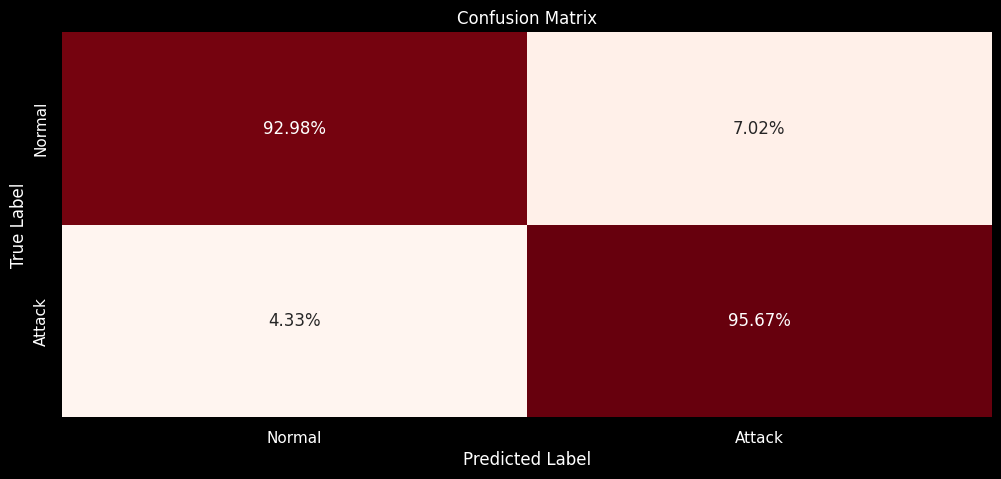

In [117]:
plot_conf_matrix(conf_matrix_best)

### Results
* The results for the baseline random tree model are already significantly better than those for the baseline model. Most notably, there's a significant increase in **balanced_accuracy**, which indicates greater balance in the results. Other metrics are also better.

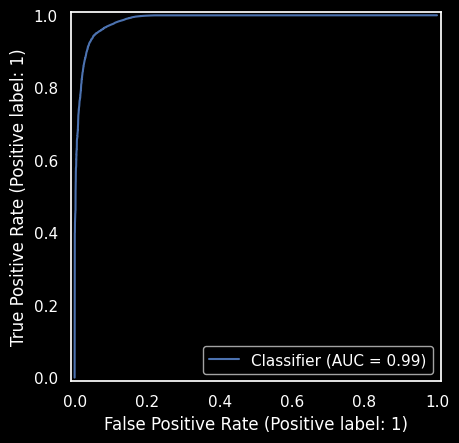

In [118]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf)         # ROC Curve

### Treshold Tuninng

In [119]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_rf = []

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    results_rf.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        # "roc_auc": roc_auc_score(y_test, y_proba_rf), # roc_auc does not depend on threshold
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

rf_threshold_df = pd.DataFrame(results_rf)
rf_threshold_df

threshold  precision    recall  f1_score  balanced_acc
0        0.10   0.986998  0.998634  0.992782      0.903185
1        0.15   0.988172  0.997046  0.992589      0.911312
2        0.20   0.989053  0.994912  0.991974      0.916982
3        0.25   0.989986  0.990789  0.990387      0.922157
4        0.30   0.991624  0.983345  0.987467      0.930974
5        0.35   0.992648  0.976217  0.984364      0.935270
6        0.40   0.994157  0.965862  0.979805      0.941446
7        0.45   0.994484  0.961901  0.977921      0.941961
8        0.50   0.995001  0.956702  0.975476      0.943229
9        0.55   0.995450  0.952528  0.973516      0.944449
10       0.60   0.995824  0.948584  0.971630      0.945221
11       0.65   0.996261  0.941797  0.968264      0.945072
12       0.70   0.996716  0.930273  0.962349      0.942741
13       0.75   0.996993  0.922752  0.958437      0.941039
14       0.80   0.997309  0.908086  0.950609      0.936139
15       0.85   0.997665  0.886454  0.938778      0.928068

In [120]:
best_t = 0.1

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best),
        "recall": recall_score(y_test, y_pred_best),
        "f1_score": f1_score(y_test, y_pred_best),
        "roc_auc" : roc_auc_score(y_test, y_proba_rf),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)
metric_pd.index = ['RF t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])

array([[  6474,   1541],
       [   160, 116982]])

accuracy  precision    recall  f1_score   roc_auc  balanced_accuracy_score
0  0.986409   0.986998  0.998634  0.992782  0.987427                 0.903185

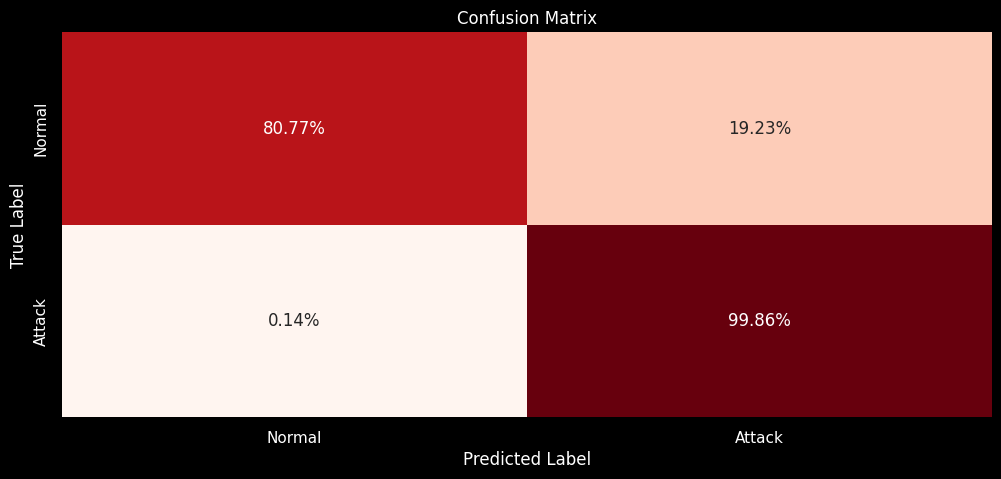

In [121]:
plot_conf_matrix(conf_matrix_best)

### Results:
* Discovered **99.86%** of Anomaly with ~**20%** Normal Traffic loss

In [122]:
# Find best balanced accuracy threshold
best_t = rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best),
        "recall": recall_score(y_test, y_pred_best),
        "f1_score": f1_score(y_test, y_pred_best),
        "roc_auc" : roc_auc_score(y_test, y_proba_rf),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

metric_pd.index = ['RF t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])

array([[  7549,    466],
       [  6023, 111119]])

accuracy  precision    recall  f1_score   roc_auc  balanced_accuracy_score
0  0.948153   0.995824  0.948584   0.97163  0.987427                 0.945221

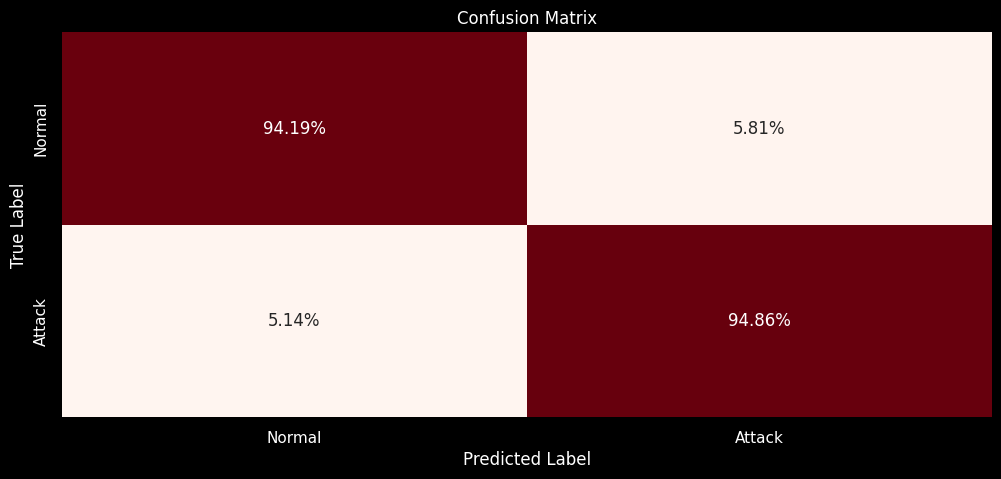

In [123]:
plot_conf_matrix(conf_matrix_best)

### Results:

* this case, I take the threshold for the maximum balanced accuracy score, which gives threshold = 0.6. In the case of Recall, as many as 95.09% of attacks were actually detected, but about 20% of normal movements were classified as attacks. Balanced of ~**95%** of properly detected attacks and ~**94%** is staisfying

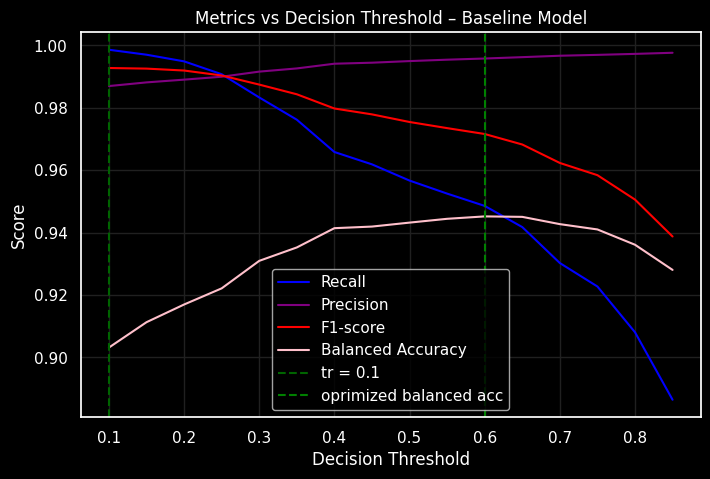

In [124]:
plt.figure(figsize=(8, 5))
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.1, linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

In [125]:

importances = rf_pipeline.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': features_rf,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

feature  importance
2              Flow_Duration    0.198484
12  Intensity_Duration_Ratio    0.174036
7               Pkt_Len_Mean    0.141782
0                Flow_Pkts/s    0.118067
1                Flow_Byts/s    0.079780
5              Flow_IAT_Mean    0.073808
10                 Idle_Mean    0.071285
8                Pkt_Len_Std    0.047362
6               Flow_IAT_Std    0.035203
11          Fwd_Bwd_Asymetry    0.022828
3               Tot_Fwd_Pkts    0.019050
4               Tot_Bwd_Pkts    0.018033
9                Active_Mean    0.000282

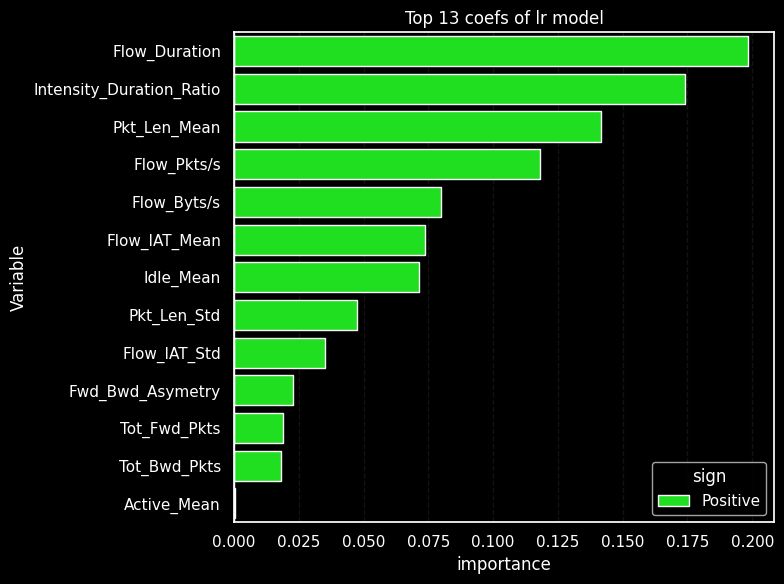

In [126]:
plot_model_coefficients(importance_df, 'importance')

In [127]:
display(finalTable)

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221

### Result:
* The higher the **importance**, the more often the feature was used for divisions - IT DOES NOT SHOW CAUSALITY!!!

## 3.2.2. Random Forest - tunning

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump
from joblib import load
from sklearn.ensemble import RandomForestClassifier

In [129]:
# same as previous
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [130]:
# For hyperparameter tuning
param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_leaf": [1, 3, 5, 10],
    "model__max_features": ["sqrt", "log2", 0.5],
    "model__min_samples_split": [2, 5, 10],
}

In [131]:
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,      # TWÓJ pipeline!
    param_distributions=param_dist,
    n_iter=30,
    scoring="recall",            # BO IDS
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [132]:
# rf_search.fit(X_train, y_train)
# dump(rf_search, "rf_random_search.joblib")

* For the Random Forest model, automatic hyperparameter selection was performed using RandomizedSearchCV. The tuning process focused on parameters controlling tree complexity and diversity, and **recall** was adopted as the optimization metric, consistent with the nature of the intrusion detection problem.

In [133]:
# Load the best pipeline calculated before cuz calculation tooks about 20 minutes
rf_search = load("rf_random_search.joblib")
display(rf_search)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Flow_Pkts/s',
                                                                                'Flow_Byts/s',
                                                                                'Flow_Duration',
                                                                                'Tot_Fwd_Pkts',
                                                                                'Tot_Bwd_Pkts',
                                                                                'Flow_IAT_Mean',
                                                                                'Flow_IAT_Std',
                                                                                'Pkt_Len_Mean',
                                                                                'Pkt_Len_Std',
                                                                                'Active_Mean',
                                                                                'Idle_Mean',
                                                                                'Fwd_Bwd_Asymetry',
                                                                                '...
                                              RandomForestClassifier(class_weight='balanced',
                                                                     min_samples_leaf=5,
                                                                     n_estimators=200,
                                                                     n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['sqrt', 'log2',
                                                                0.5],
                                        'model__min_samples_leaf': [1, 3, 5,
                                                                    10],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall', verbose=2)

In [134]:
y_pred_rf = rf_search.best_estimator_.predict(X_test)
y_proba_rf = rf_search.best_estimator_.predict_proba(X_test)[:, 1]

In [135]:
conf_matrix_best = confusion_matrix(y_test, y_pred_rf)

display(conf_matrix_best)
metric_pd = calc_metrics(y_pred_rf, y_test, y_proba_rf)
metric_pd.index = ['RF tuned']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)


array([[  7419,    596],
       [  4844, 112298]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144

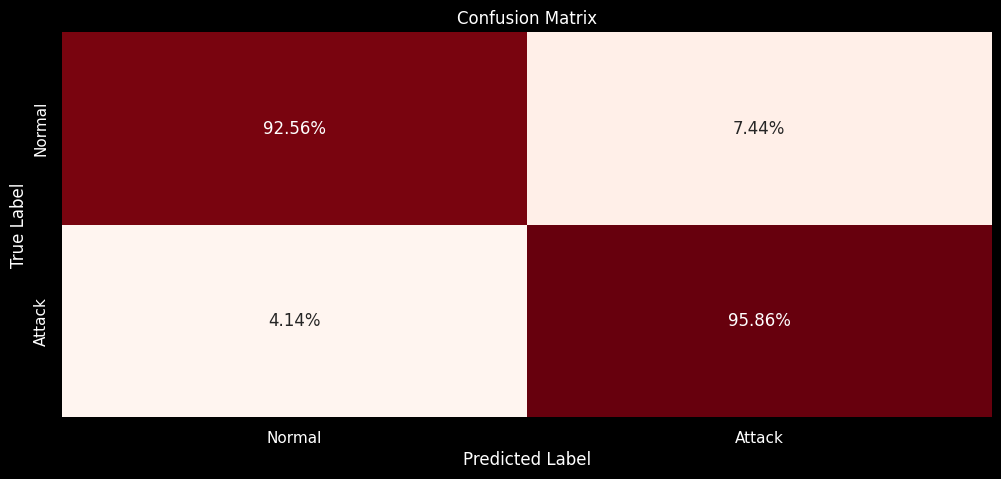

In [136]:
plot_conf_matrix(conf_matrix_best)

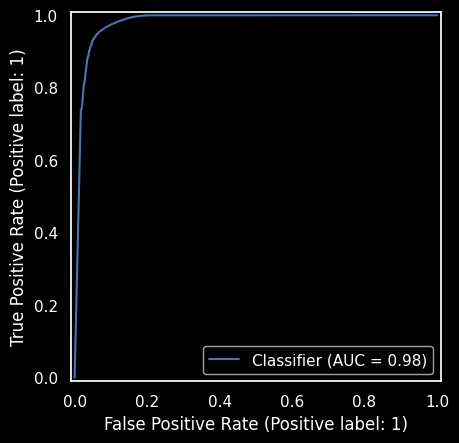

In [137]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf)         # ROC Curve

### Treshold Tuninng

In [138]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_rf = []

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    results_rf.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

rf_threshold_df = pd.DataFrame(results_rf)
rf_threshold_df

threshold  precision    recall  f1_score  balanced_acc
0        0.10   0.987564  0.998523  0.993013      0.907371
1        0.15   0.988375  0.997268  0.992802      0.912920
2        0.20   0.989166  0.995356  0.992252      0.918015
3        0.25   0.989969  0.991617  0.990792      0.922384
4        0.30   0.991567  0.983704  0.987620      0.930716
5        0.35   0.992487  0.977711  0.985043      0.934769
6        0.40   0.993722  0.968910  0.981159      0.939726
7        0.45   0.994233  0.963899  0.978831      0.941088
8        0.50   0.994721  0.958648  0.976352      0.942144
9        0.55   0.995088  0.954713  0.974483      0.942921
10       0.60   0.995344  0.950889  0.972609      0.942943
11       0.65   0.995726  0.944785  0.969587      0.942761
12       0.70   0.996137  0.935625  0.964933      0.941300
13       0.75   0.996380  0.930460  0.962293      0.940527
14       0.80   0.996553  0.918125  0.955733      0.935856
15       0.85   0.996868  0.904902  0.948661      0.931677

In [139]:
best_t = rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_rf)
metric_pd.index = ['RF tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)


array([[  7494,    521],
       [  5753, 111389]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943

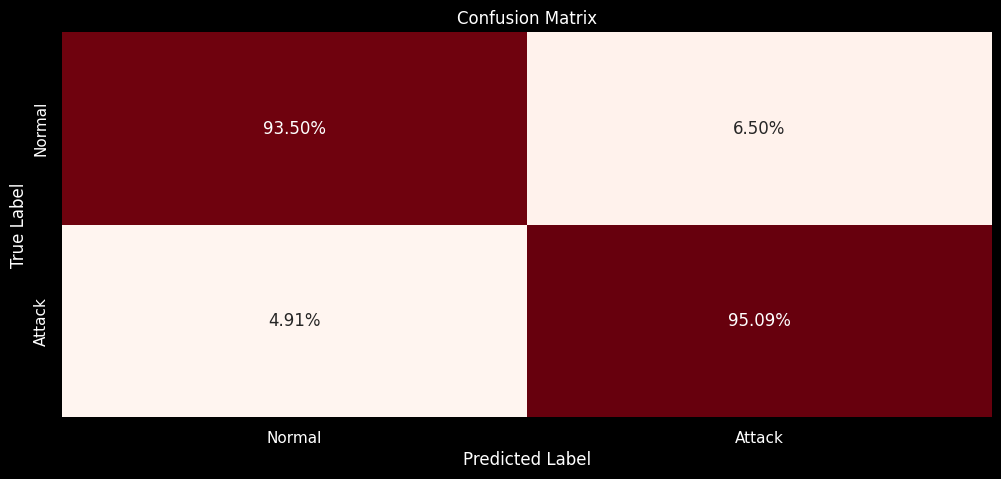

In [140]:
plot_conf_matrix(conf_matrix_best)

In [141]:
best_t = 0.25

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_rf)
metric_pd.index = ['RF tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6836,   1179],
       [   982, 116160]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259

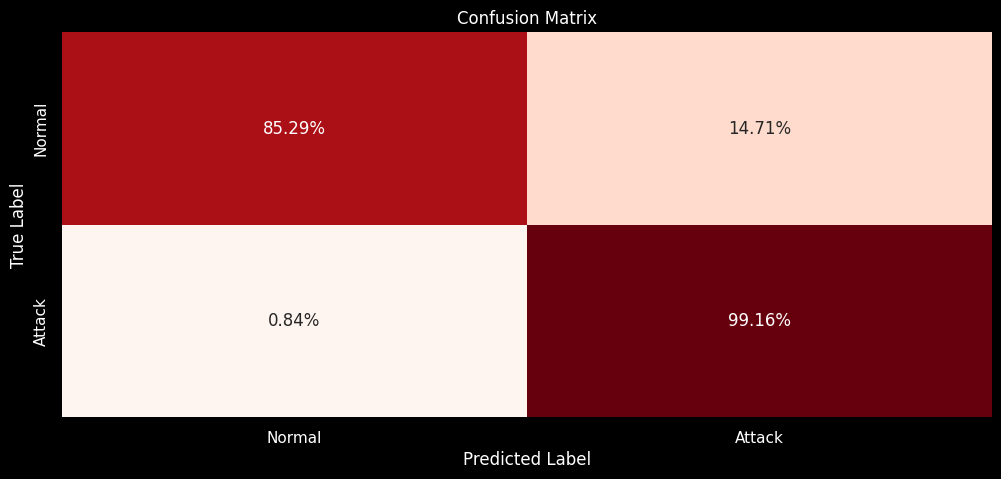

In [142]:
plot_conf_matrix(conf_matrix_best)

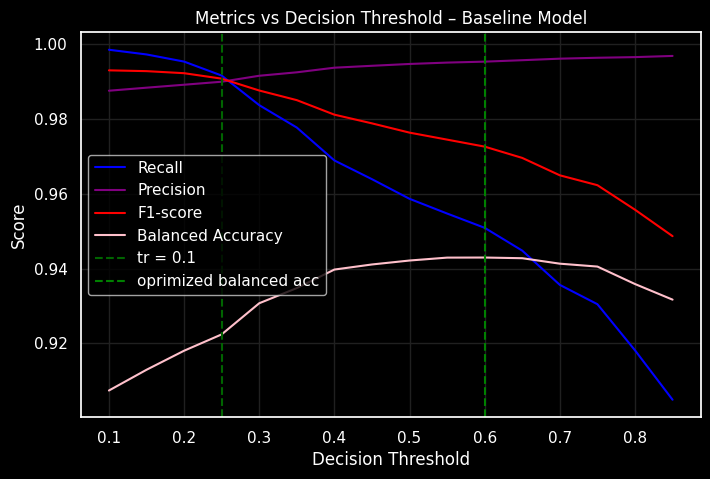

In [143]:
plt.figure(figsize=(8, 5))
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.25, linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

In [144]:
importances = rf_search.best_estimator_.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': features_rf,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

feature    importance
2              Flow_Duration  2.718144e-01
12  Intensity_Duration_Ratio  2.212314e-01
7               Pkt_Len_Mean  1.555638e-01
0                Flow_Pkts/s  8.534868e-02
1                Flow_Byts/s  5.879803e-02
8                Pkt_Len_Std  4.836600e-02
10                 Idle_Mean  4.210597e-02
5              Flow_IAT_Mean  4.175731e-02
11          Fwd_Bwd_Asymetry  2.275406e-02
4               Tot_Bwd_Pkts  2.021079e-02
3               Tot_Fwd_Pkts  1.704664e-02
6               Flow_IAT_Std  1.500246e-02
9                Active_Mean  4.521813e-07

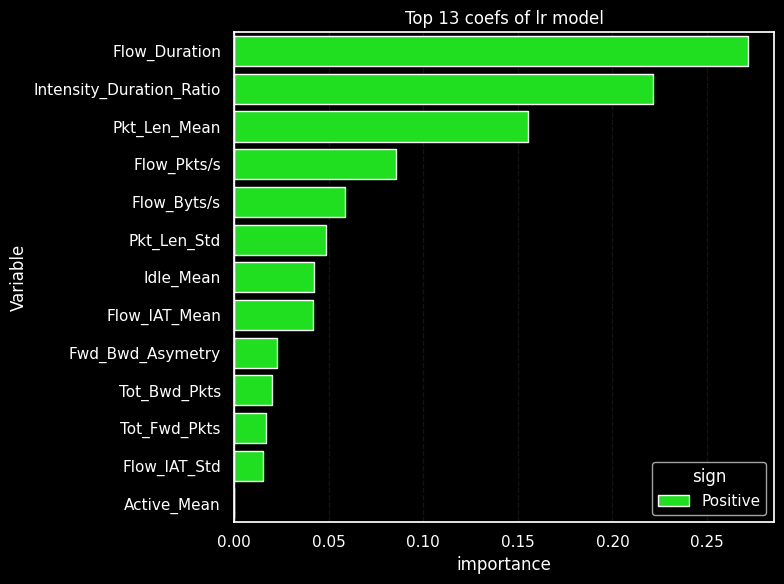

In [145]:
plot_model_coefficients(importance_df, 'importance')

### Results:
* When selecting the threshold at the intersection of the Precision | Recall and F1 Score curves, i.e., tr = 0.25, an accuracy of **99.16%** was achieved, which is the highest value to date. In the case of balanced accuracy, the result is slightly worse for the RF model with tuned hyperparameters than for the baseline RF model. This may be due to the lack of folding in the baseline model (there may be slightly worse/better results for different seeds). The results for the RF model are significantly better than those for the logistic regression model.

## 3.2.3. Random Forest - all variables test

In [146]:
df_rf_all = df.copy()
df_rf_all.drop(columns=['Label', 'Label_bin'], inplace=True)
df_rf_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 69 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  625783 non-null  int64  
 1   Flow_Duration             625783 non-null  int64  
 2   Tot_Fwd_Pkts              625783 non-null  int64  
 3   Tot_Bwd_Pkts              625783 non-null  int64  
 4   TotLen_Fwd_Pkts           625783 non-null  float64
 5   TotLen_Bwd_Pkts           625783 non-null  float64
 6   Fwd_Pkt_Len_Max           625783 non-null  float64
 7   Fwd_Pkt_Len_Min           625783 non-null  float64
 8   Fwd_Pkt_Len_Mean          625783 non-null  float64
 9   Fwd_Pkt_Len_Std           625783 non-null  float64
 10  Bwd_Pkt_Len_Max           625783 non-null  float64
 11  Bwd_Pkt_Len_Min           625783 non-null  float64
 12  Bwd_Pkt_Len_Mean          625783 non-null  float64
 13  Bwd_Pkt_Len_Std           625783 non-null  f

In [147]:
X = df_rf_all
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify musi być bo target jest irregular!!!!

In [148]:
num_features = df_rf_all.select_dtypes(include=['number']).columns

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features)
    ]
)

In [149]:
# same as previous
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [150]:
# Create pipline
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf_model)
])

In [151]:
param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_leaf": [1, 3, 5, 10],
    "model__max_features": ["sqrt", "log2", 0.5]
}

In [152]:
rf_search_all = RandomizedSearchCV(
    estimator=rf_pipeline,      # TWÓJ pipeline!
    param_distributions=param_dist,
    n_iter=20,
    scoring="recall",            # BO IDS
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [153]:
# rf_search_all.fit(X_train, y_train)
# dump(rf_search_all, "rf_random_search_ALL_PARAMS.joblib")

In [154]:
rf_search = load("rf_random_search_ALL_PARAMS.joblib")

In [155]:
y_pred_rf = rf_search.best_estimator_.predict(X_test)
y_proba_rf = rf_search.best_estimator_.predict_proba(X_test)[:, 1]

In [156]:
conf_matrix_best = confusion_matrix(y_test, y_pred_rf)

display(conf_matrix_best)
metric_pd = calc_metrics(y_pred_rf, y_test, y_proba_rf)
metric_pd.index = ['RF tuned all']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)



array([[  7613,    402],
       [  2674, 114468]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509

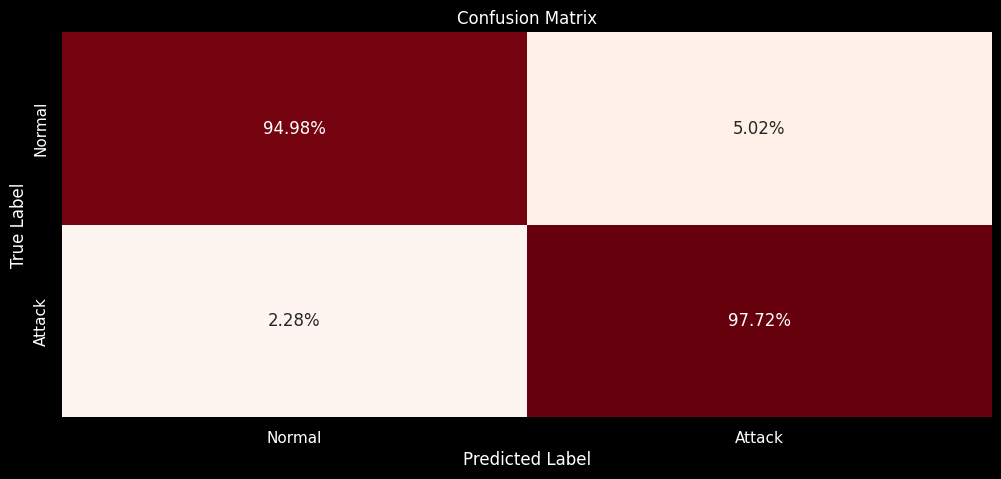

In [157]:
plot_conf_matrix(conf_matrix_best)



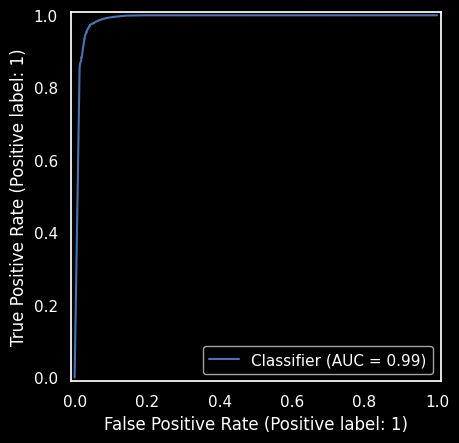

In [158]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf) 

In [159]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_rf = []

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    results_rf.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

rf_threshold_df = pd.DataFrame(results_rf)
rf_threshold_df



threshold  precision    recall  f1_score  balanced_acc
0        0.10   0.991142  0.998156  0.994637      0.933888
1        0.15   0.992479  0.995894  0.994184      0.942800
2        0.20   0.993656  0.993384  0.993520      0.950341
3        0.25   0.994204  0.991378  0.992789      0.953456
4        0.30   0.994946  0.988254  0.991589      0.957446
5        0.35   0.995504  0.984890  0.990169      0.959944
6        0.40   0.995964  0.981655  0.988758      0.961757
7        0.45   0.996315  0.978573  0.987364      0.962836
8        0.50   0.996500  0.977173  0.986742      0.963509
9        0.55   0.996705  0.976217  0.986355      0.964528
10       0.60   0.996941  0.973724  0.985196      0.965028
11       0.65   0.997040  0.971889  0.984304      0.964859
12       0.70   0.997202  0.967441  0.982096      0.963883
13       0.75   0.997417  0.962473  0.979633      0.963021
14       0.80   0.997523  0.959246  0.978010      0.962218
15       0.85   0.997677  0.953398  0.975035      0.960480

In [160]:
best_t = rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_rf)
metric_pd.index = ['RF tuned all t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)



array([[  7665,    350],
       [  3078, 114064]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028

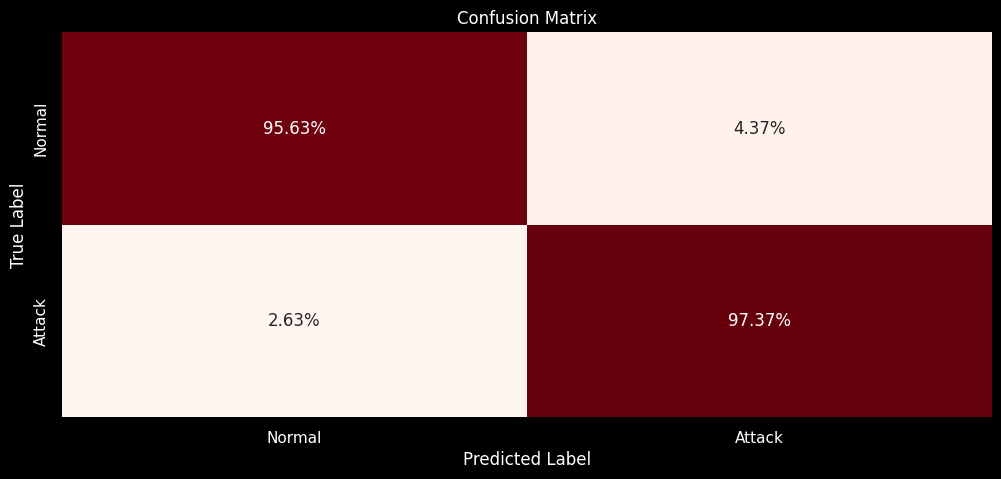

In [161]:
plot_conf_matrix(conf_matrix_best)

In [162]:
best_t = 0.25

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_rf)
metric_pd.index = ['RF tuned all t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  7336,    679],
       [  1010, 116132]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331

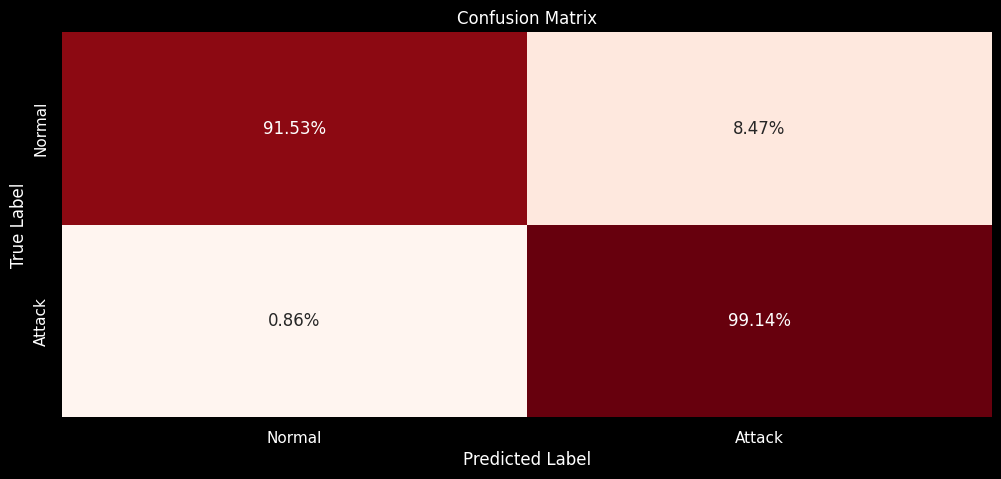

In [163]:
plot_conf_matrix(conf_matrix_best)

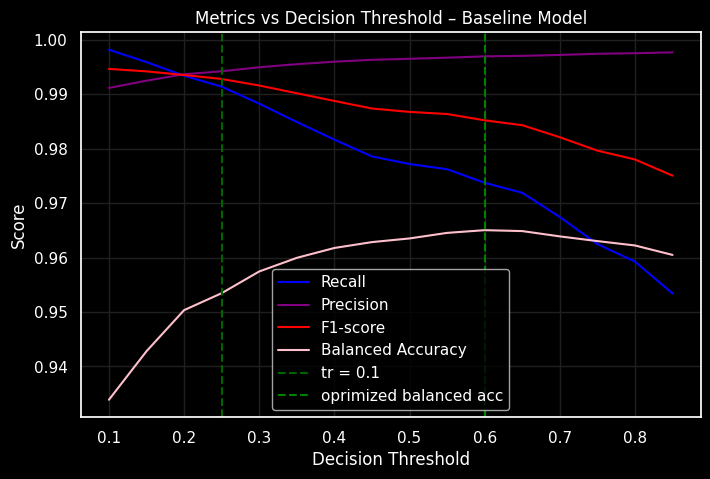

In [164]:
plt.figure(figsize=(8, 5))
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.25, linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()



In [165]:
importances = rf_search.best_estimator_.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df



feature    importance
57         Init_Bwd_Win_Byts  3.399636e-01
1              Flow_Duration  1.785803e-01
67  Intensity_Duration_Ratio  1.233846e-01
45              ACK_Flag_Cnt  1.003994e-01
15               Flow_Pkts/s  4.245880e-02
..                       ...           ...
62                Active_Min  2.350605e-06
31             Bwd_URG_Flags  8.512801e-07
46              URG_Flag_Cnt  4.349900e-07
60                Active_Std  8.320367e-15
61                Active_Max  2.530613e-15

[69 rows x 2 columns]

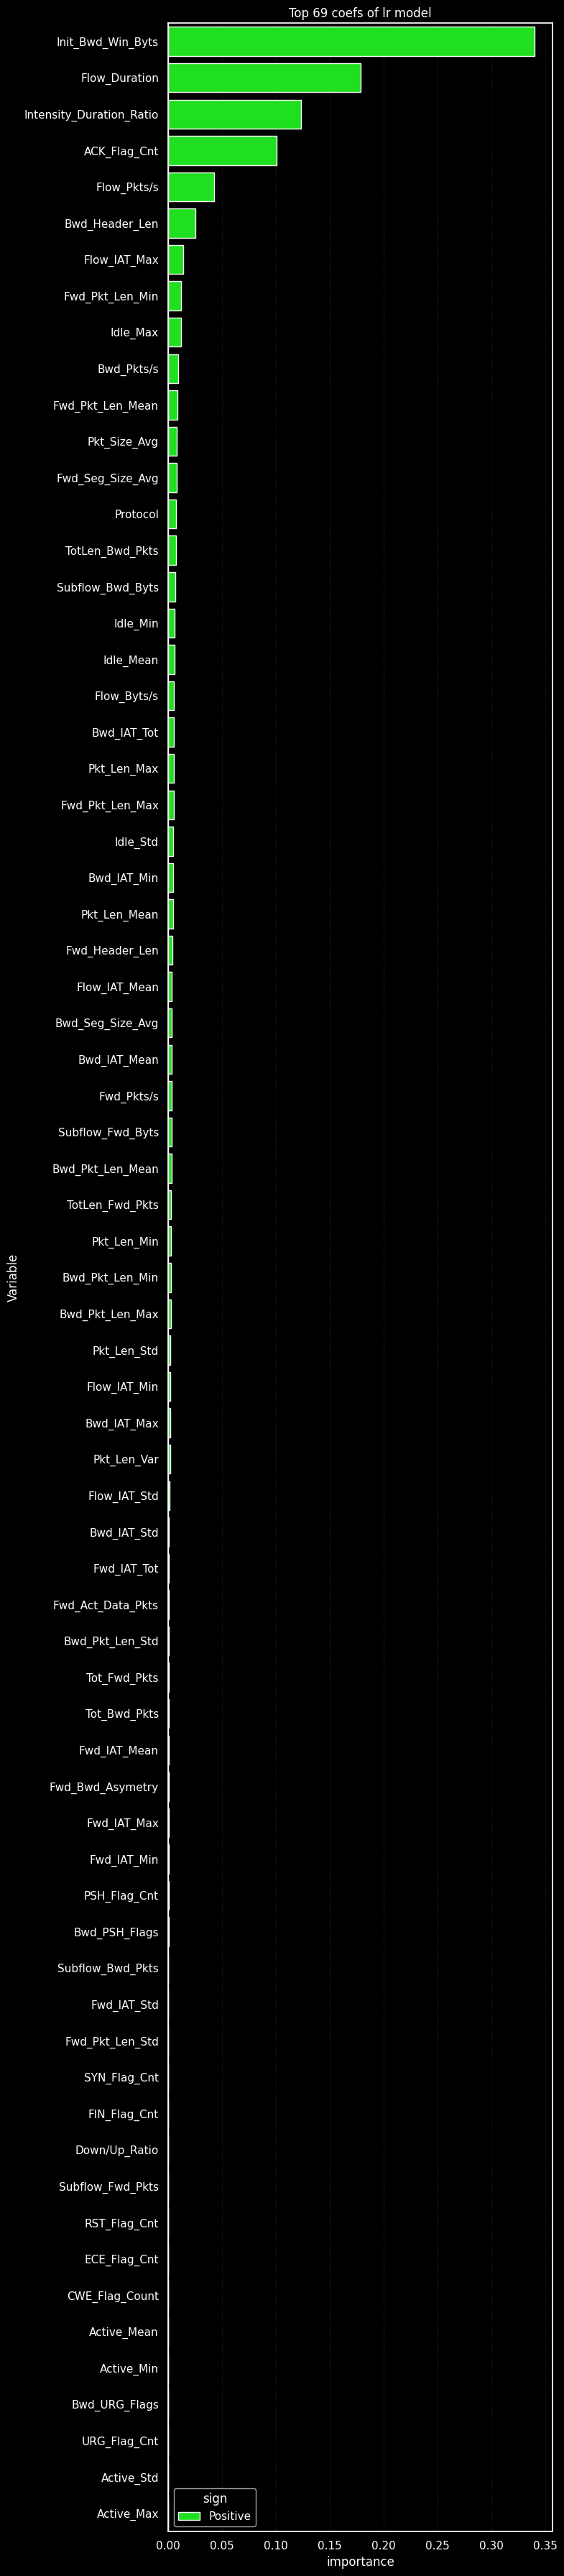

In [166]:
plot_model_coefficients(importance_df, 'importance')

### Results:
* Nieznaczny wzrost poprawnych "Normal" traffic, reszta bez zmian. Niepotzrebne nadużycie ilości zmiennych 

In [167]:
# explainer = shap.TreeExplainer(rf_search.best_estimator_.named_steps['model'])
# shap_values = explainer.shap_values(
#     rf_search.best_estimator_.named_steps['preprocessing'].transform(X_test)
# )

# shap.summary_plot(shap_values, X_test)

# 3. XGBOOST

* models nonlinearities

* great for unbalanced data

* better calibration than RF

* stronger bias–variance trade-off

* less interpretable than LR

* more sensitive to overfitting → hyperparameters are important

## 3.3.1. XGBoost base

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [169]:
# same as in RF base
features_xgb = [
    'Flow_Pkts/s',
    'Flow_Byts/s',
    'Flow_Duration',
    'Tot_Fwd_Pkts',
    'Tot_Bwd_Pkts',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',

    'Pkt_Len_Mean',
    'Pkt_Len_Std',

    'Active_Mean',
    'Idle_Mean',

    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio'
]

In [170]:
X = df[features_xgb].copy()
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify for unbalanced target

In [171]:
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, features_xgb)
    ]
)

In [172]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),       # balancing classes
    random_state=42,
    n_jobs=-1
)

In [173]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", xgb_model)
])

In [174]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Flow_Pkts/s', 'Flow_Byts/s',
                                                   'Flow_Duration',
                                                   'Tot_Fwd_Pkts',
                                                   'Tot_Bwd_Pkts',
                                                   'Flow_IAT_Mean',
                                                   'Flow_IAT_Std',
                                                   'Pkt_Len_Mean',
                                                   'Pkt_Len_Std', 'Active_Mean',
                                                   'Idle_Mean',
                                                   'Fwd_Bwd_Asymetry',
                                                   'Intensity_Duration_Ratio'])])),
                ('m...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [175]:
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

In [176]:
#  Save to final results
conf_matrix_best = confusion_matrix(y_test, y_pred_xgb)
display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_xgb, y_test, y_proba_xgb)
metric_pd.index = ['XGB base']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable) 


array([[  7574,    441],
       [  5969, 111173]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011

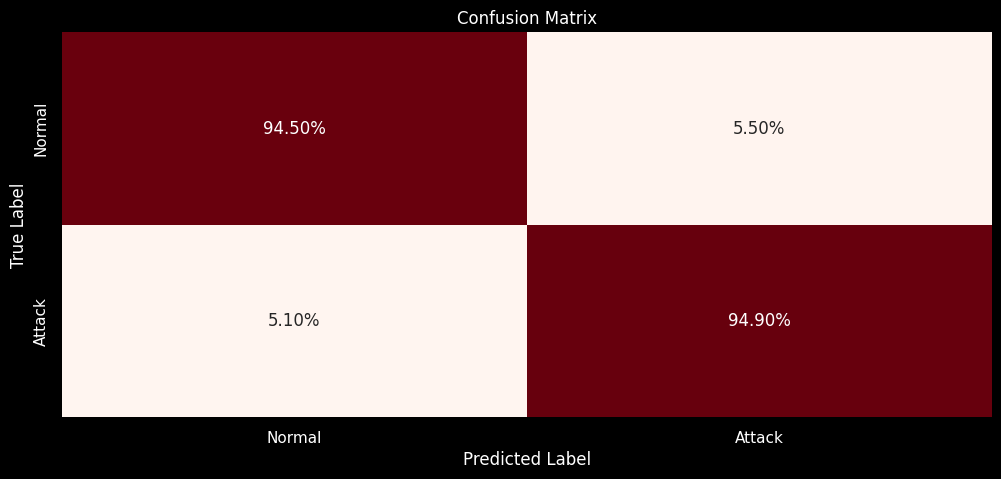

In [177]:
plot_conf_matrix(conf_matrix_best)

### Tresholds

In [178]:
thresholds = np.arange(0.1, 0.9, 0.05)
results_xgb = []

for t in thresholds:
    y_pred_t = (y_proba_xgb >= t).astype(int)
    results_xgb.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        "roc_auc" : roc_auc_score(y_test, y_proba_xgb),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

xgb_threshold_df = pd.DataFrame(results_xgb)
xgb_threshold_df

threshold  precision    recall  f1_score   roc_auc  balanced_acc
0        0.10   0.987656  0.998583  0.993089  0.989682      0.908087
1        0.15   0.988986  0.996534  0.992746  0.989682      0.917169
2        0.20   0.990064  0.993555  0.991806  0.989682      0.923914
3        0.25   0.991207  0.988339  0.989771  0.989682      0.930102
4        0.30   0.992960  0.978949  0.985905  0.989682      0.938757
5        0.35   0.994087  0.970224  0.982011  0.989682      0.942941
6        0.40   0.995292  0.960057  0.977357  0.989682      0.946841
7        0.45   0.995668  0.955533  0.975188  0.989682      0.947386
8        0.50   0.996049  0.949045  0.971979  0.989682      0.947011
9        0.55   0.996409  0.942685  0.968803  0.989682      0.946514
10       0.60   0.996747  0.936436  0.965651  0.989682      0.945885
11       0.65   0.997078  0.929308  0.962001  0.989682      0.944754
12       0.70   0.997403  0.918125  0.956124  0.989682      0.941595
13       0.75   0.997698  0.910109  0.951893  0.989682      0.939708
14       0.80   0.997942  0.894163  0.943206  0.989682      0.933607
15       0.85   0.998206  0.869065  0.929170  0.989682      0.923116

In [179]:
best_t = xgb_threshold_df.loc[xgb_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_xgb >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_xgb)
metric_pd.index = ['XGB t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  7528,    487],
       [  5209, 111933]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386

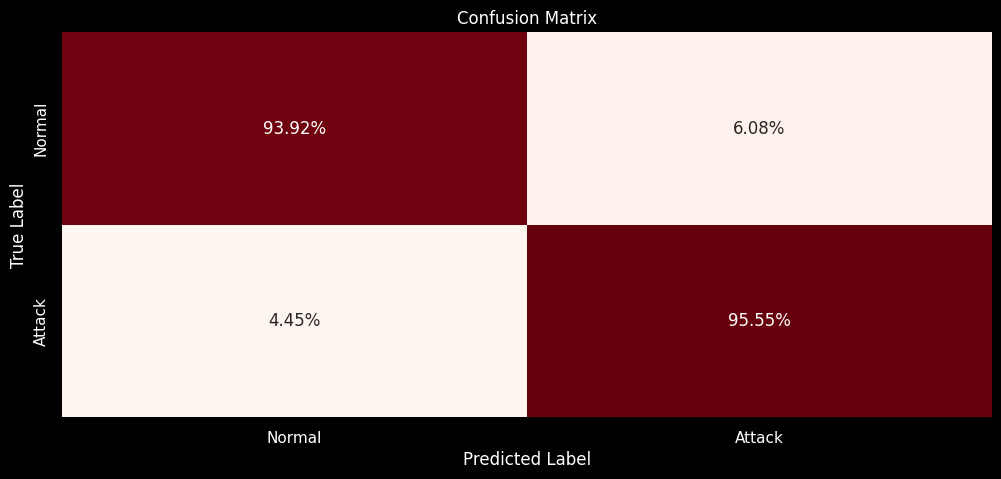

In [180]:
plot_conf_matrix(conf_matrix_best)

In [181]:
best_t = xgb_threshold_df.loc[xgb_threshold_df['f1_score'].idxmax(), 'threshold']

y_pred_best = (y_proba_xgb >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_xgb)
metric_pd.index = ['XGB t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6553,   1462],
       [   166, 116976]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087

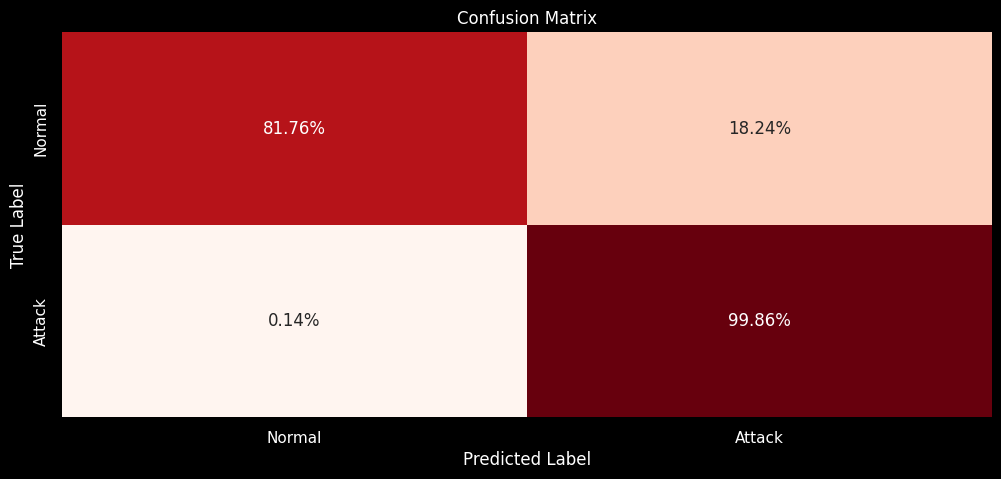

In [182]:
plot_conf_matrix(conf_matrix_best)

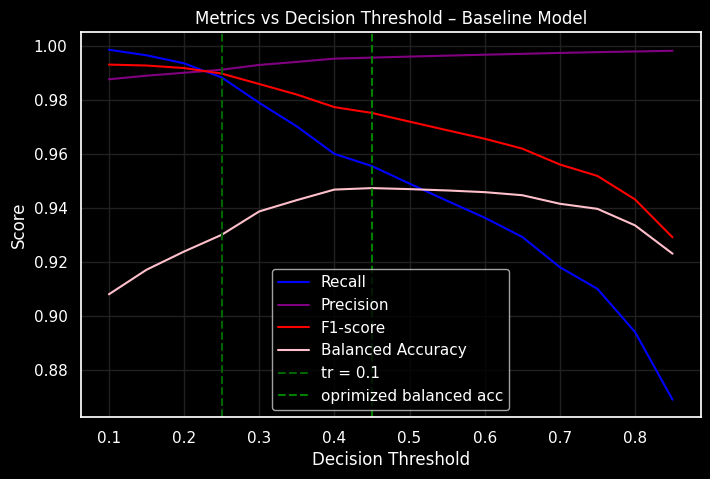

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.25, linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=xgb_threshold_df.loc[xgb_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()


### Variable Importance

In [184]:
importances = xgb_pipeline.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': features_xgb,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

feature  importance
12  Intensity_Duration_Ratio    0.329209
2              Flow_Duration    0.189033
5              Flow_IAT_Mean    0.127857
7               Pkt_Len_Mean    0.072260
3               Tot_Fwd_Pkts    0.058142
11          Fwd_Bwd_Asymetry    0.056137
4               Tot_Bwd_Pkts    0.055351
0                Flow_Pkts/s    0.047736
8                Pkt_Len_Std    0.024766
1                Flow_Byts/s    0.021945
10                 Idle_Mean    0.010528
6               Flow_IAT_Std    0.007034
9                Active_Mean    0.000000

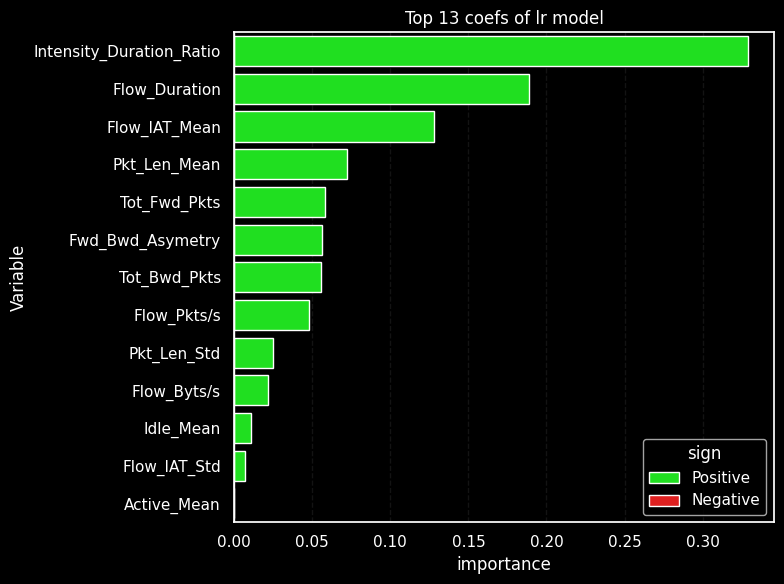

In [185]:
plot_model_coefficients(importance_df, 'importance')

### Results:
* The most frequently used variables for splitting were intensity_Duration_Ratio, Flow_Duration, and Flow_IAT_Mean. With respect to RF, Flow_Duration was the most decisive, followed by Intensity_Duration_Ratio. Flow_IAT_Mean was not in the top three.

* Shap needs np v 2.3.0.

In [186]:
np.__version__

'2.3.0'

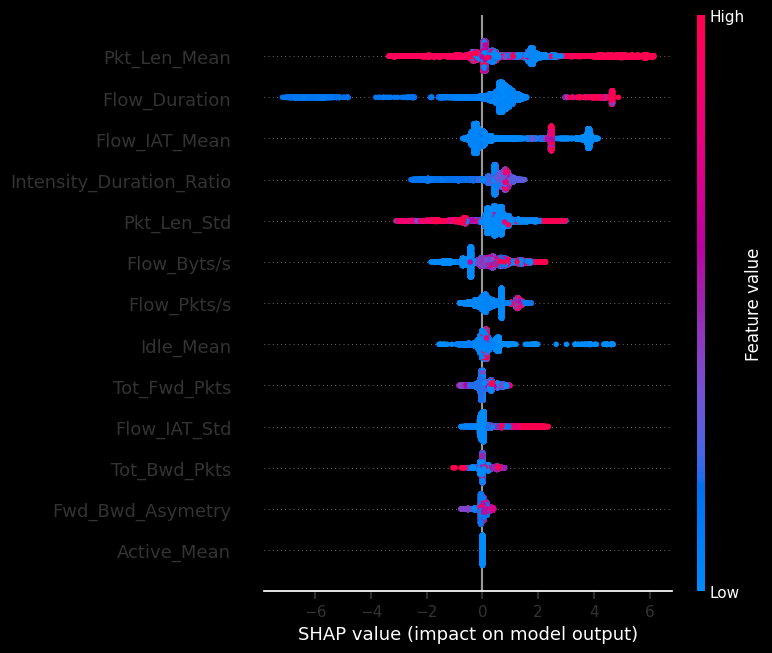

In [187]:
import shap

explainer = shap.TreeExplainer(xgb_pipeline.named_steps['model'])
shap_values = explainer.shap_values(
    xgb_pipeline.named_steps['preprocessing'].transform(X_test)
)

shap.summary_plot(shap_values, X_test[features_xgb])

### Results

* The higher the vertical position of the variable, the greater the influence the variable has on model decisions. Pkt_Len_Mean had the greatest influence on model decisions. It's impossible to clearly determine which values ​​caused the decision to move toward "Anomaly" and which values ​​caused "Normal." In fact, higher values ​​were more decisive. In this case, we can say that the model answered the question "Is this an attack?" - "It depends..." In Flow_Duration, it's clear that high values ​​indicate "Anomaly" while low values ​​indicate "Normal." Similarly, in Flow_IAT_Std and Flow_Pkt/s.
* The graph is very useful, allowing us to determine which variables can, in reality, clearly distinguish an attack from normal traffic.

 # 3.1 XGBOOST UPGRADE

In [188]:
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    n_jobs=-1
)

In [189]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", xgb_base)
])


In [190]:
param_dist_xgb = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

In [191]:
from sklearn.model_selection import RandomizedSearchCV

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=20,                # 20–30 wystarczy
    scoring="recall",         # IDS → recall!
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [192]:
xgb_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500, model__subsample=0.7; total time=  17.0s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500, model__subsample=0.7; total time=  17.1s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500, model__subsample=0.7; total time=  18.7s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=5, model__n_estimators=500, model__subsample=1.0; total time=  20.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=5, model__n_estimators=500, model__subsample=1.0; total time=  20.7s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=7, model__n_estimators=500, model__subsample=0.7; total time=  28.5s
[CV] END model__colsample_bytree=0.

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Flow_Pkts/s',
                                                                                'Flow_Byts/s',
                                                                                'Flow_Duration',
                                                                                'Tot_Fwd_Pkts',
                                                                                'Tot_Bwd_Pkts',
                                                                                'Flow_IAT_Mean',
                                                                                'Flow_IAT_Std',
                                                                                'Pkt_Len_Mean',
                                                                                'Pkt_Len_Std',
                                                                                'Active_Mean',
                                                                                'Idle_Mean',
                                                                                'Fwd_Bwd_Asymetry',
                                                                                '...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.05, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [200, 300, 500],
                                        'model__subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=2)

In [193]:
y_pred_xgb = xgb_search.best_estimator_.predict(X_test)
y_proba_xgb = xgb_search.best_estimator_.predict_proba(X_test)[:, 1]

In [194]:
conf_matrix_best = confusion_matrix(y_test, y_pred_xgb)

display(conf_matrix_best)
# metrics = {
#         "accuracy": accuracy_score(y_test, y_pred_xgb),
#         "precision": precision_score(y_test, y_pred_xgb),
#         "recall": recall_score(y_test, y_pred_xgb),
#         "roc_auc": roc_auc_score(y_test, y_proba_xgb),
#         "f1_score": f1_score(y_test, y_pred_xgb),
#         "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_xgb)
#     } 
# metric_pd = pd.DataFrame([metrics])
# display(metric_pd)
metric_pd = calc_metrics(y_pred_xgb, y_test, y_proba_xgb)
metric_pd.index = ['XGB tuned']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)


array([[  7570,    445],
       [  5624, 111518]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   
XGB tuned              0.951509   0.996025  0.951990  0.973510  0.989451   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087  
XGB tuned                             0.948234

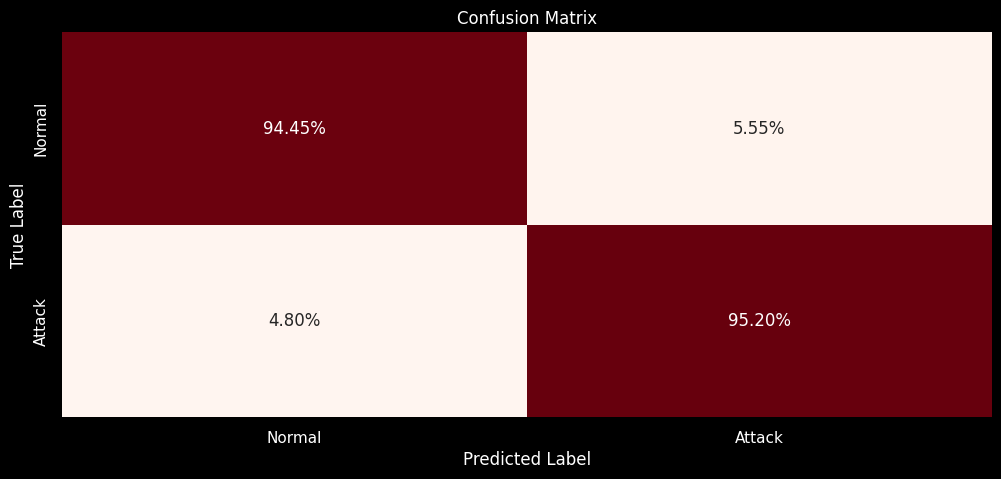

In [195]:
plot_conf_matrix(conf_matrix_best)

### Treshods

In [196]:
thresholds = np.arange(0.1, 0.9, 0.05)
results_xgb = []

for t in thresholds:
    y_pred_t = (y_proba_xgb >= t).astype(int)
    results_xgb.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        "roc_auc" : roc_auc_score(y_test, y_proba_xgb),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

xgb_threshold_df = pd.DataFrame(results_xgb)
xgb_threshold_df

threshold  precision    recall  f1_score   roc_auc  balanced_acc
0        0.10   0.988422  0.997729  0.993054  0.989451      0.913462
1        0.15   0.989364  0.995791  0.992567  0.989451      0.919667
2        0.20   0.990319  0.992932  0.991624  0.989451      0.925536
3        0.25   0.991279  0.988783  0.990029  0.989451      0.930823
4        0.30   0.993138  0.977318  0.985165  0.989451      0.939314
5        0.35   0.993941  0.971803  0.982747  0.989451      0.942608
6        0.40   0.995125  0.961841  0.978200  0.989451      0.946485
7        0.45   0.995613  0.956950  0.975898  0.989451      0.947658
8        0.50   0.996025  0.951990  0.973510  0.989451      0.948234
9        0.55   0.996438  0.945545  0.970324  0.989451      0.948069
10       0.60   0.996680  0.940653  0.967857  0.989451      0.947432
11       0.65   0.996962  0.932757  0.963791  0.989451      0.945605
12       0.70   0.997242  0.922914  0.958639  0.989451      0.942805
13       0.75   0.997489  0.915752  0.954875  0.989451      0.941032
14       0.80   0.997677  0.901922  0.947386  0.989451      0.935615
15       0.85   0.998032  0.879002  0.934743  0.989451      0.926837

In [197]:
best_t = xgb_threshold_df.loc[xgb_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_xgb >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_xgb)
metric_pd.index = ['XGB tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  7570,    445],
       [  5624, 111518]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   
XGB tuned              0.951509   0.996025  0.951990  0.973510  0.989451   
XGB tuned t = 0.50     0.951509   0.996025  0.951990  0.973510  0.989451   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087  
XGB tuned                             0.948234  
XGB tuned t = 0.50                    0.948234

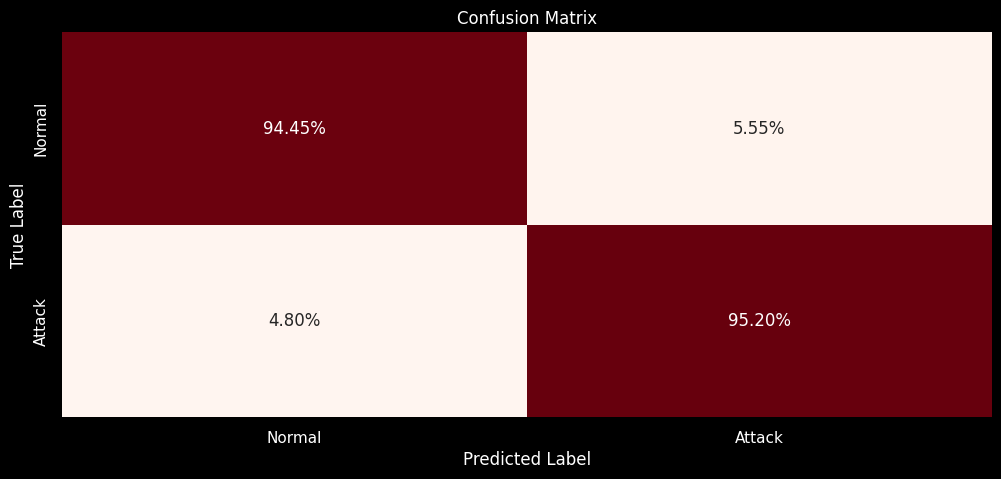

In [198]:
plot_conf_matrix(conf_matrix_best)

In [ ]:
best_t = xgb_threshold_df.loc[xgb_threshold_df['f1_score'].idxmax(), 'threshold']

y_pred_best = (y_proba_xgb >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)

metric_pd = calc_metrics(y_pred_best, y_test, y_proba_xgb)
metric_pd.index = ['XGB tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6646,   1369],
       [   266, 116876]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   
XGB tuned              0.951509   0.996025  0.951990  0.973510  0.989451   
XGB tuned t = 0.50     0.951509   0.996025  0.951990  0.973510  0.989451   
XGB t = 0.10           0.986936   0.988422  0.997729  0.993054  0.989451   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087  
XGB tuned                             0.948234  
XGB tuned t = 0.50                    0.948234  
XGB t = 0.10                          0.913462

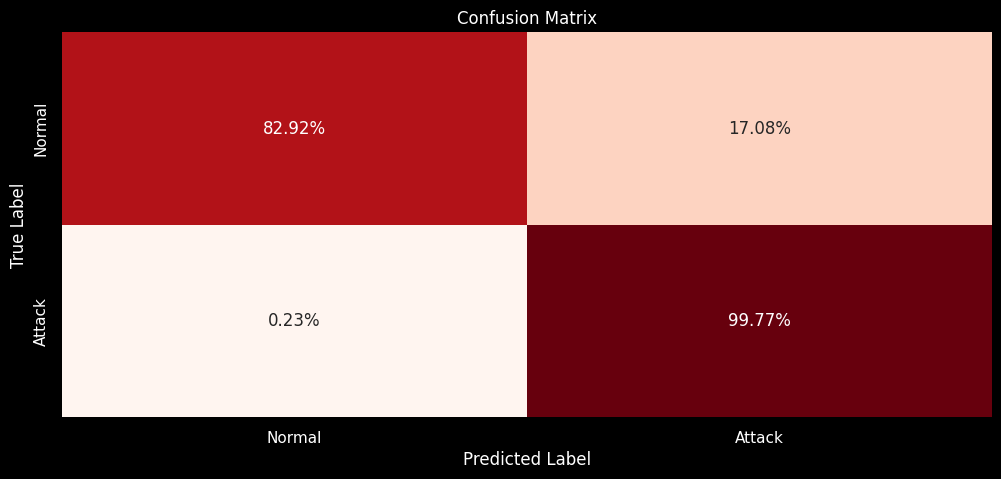

In [200]:
plot_conf_matrix(conf_matrix_best)

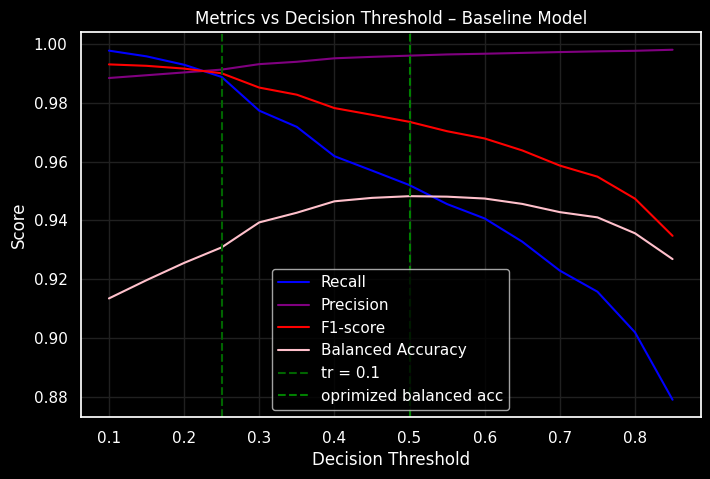

In [201]:
plt.figure(figsize=(8, 5))
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(xgb_threshold_df['threshold'], xgb_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=0.25, linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=xgb_threshold_df.loc[xgb_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

### Variable Importance

In [202]:
importances = xgb_search.best_estimator_.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': features_xgb,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

feature  importance
12  Intensity_Duration_Ratio    0.395313
2              Flow_Duration    0.178110
4               Tot_Bwd_Pkts    0.096331
7               Pkt_Len_Mean    0.081084
5              Flow_IAT_Mean    0.076404
0                Flow_Pkts/s    0.047665
3               Tot_Fwd_Pkts    0.047271
8                Pkt_Len_Std    0.033133
1                Flow_Byts/s    0.016655
11          Fwd_Bwd_Asymetry    0.011121
10                 Idle_Mean    0.010533
6               Flow_IAT_Std    0.006378
9                Active_Mean    0.000000

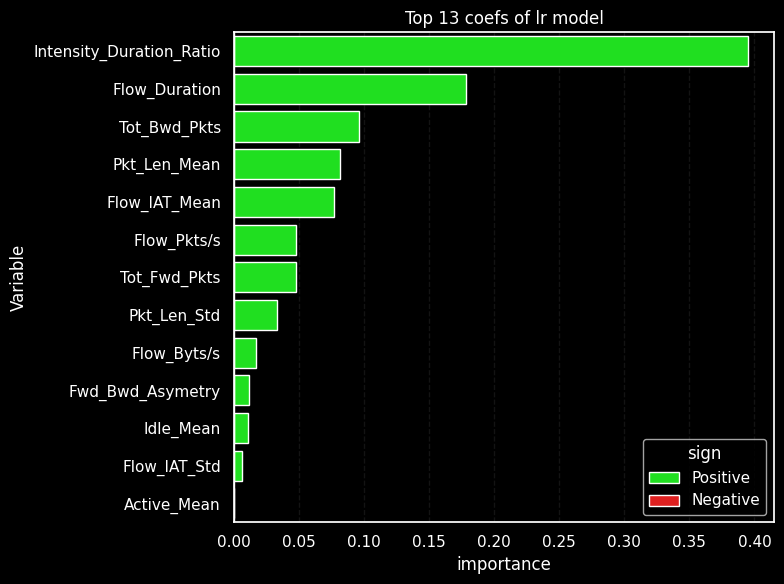

In [203]:
plot_model_coefficients(importance_df, 'importance')

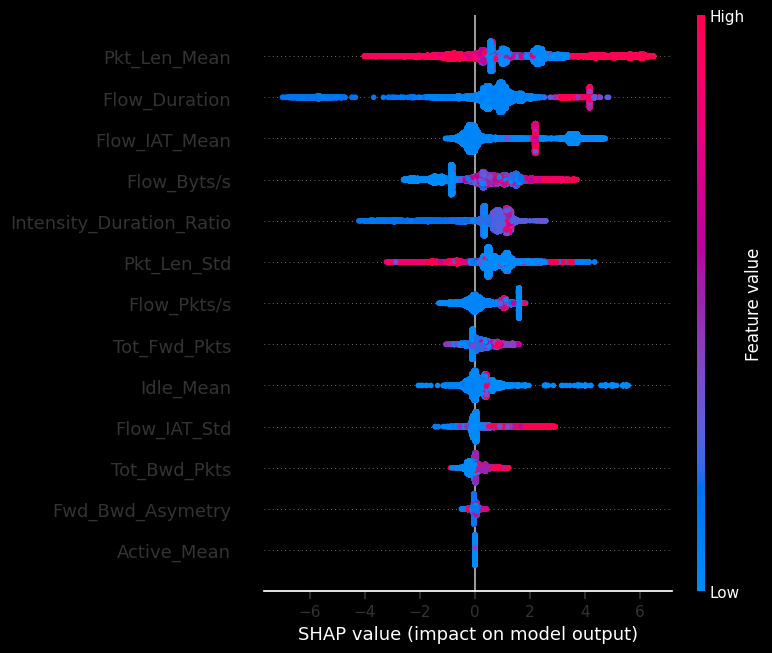

In [204]:
explainer = shap.TreeExplainer(xgb_search.best_estimator_.named_steps['model'])
shap_values = explainer.shap_values(
    xgb_search.best_estimator_.named_steps['preprocessing'].transform(X_test)
)

shap.summary_plot(shap_values, X_test[features_xgb])

### Resuts:
* similar to prev XGB Model

# 4. Neural Network?

In [205]:
from sklearn.neural_network import MLPClassifier

mlp_features = features_xgb  # same set as XGB and RF

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

mlp_pipeline = Pipeline(steps=[
    ("preprocessing", ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]), mlp_features)
        ]
    )),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=50,
        random_state=42
    ))
])

In [207]:
mlp_pipeline.fit(X_train, y_train)

y_proba_mlp = mlp_pipeline.predict_proba(X_test)[:, 1]
y_pred_mlp = (y_proba_mlp >= 0.50).astype(int)


/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [208]:
conf_matrix_best = confusion_matrix(y_test, y_pred_mlp)

display(conf_matrix_best)
# metrics = {
#         "accuracy": accuracy_score(y_test, y_pred_mlp),
#         "precision": precision_score(y_test, y_pred_mlp),
#         "recall": recall_score(y_test, y_pred_mlp),
#         "roc_auc": roc_auc_score(y_test, y_proba_mlp),
#         "f1_score": f1_score(y_test, y_pred_mlp),
#         "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_mlp)
#     } 
# metric_pd = pd.DataFrame([metrics])
# display(metric_pd)
metric_pd = calc_metrics(y_pred_mlp, y_test, y_proba_mlp)
metric_pd.index = ['MLP t = 0.50']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6417,   1598],
       [   276, 116866]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   
XGB tuned              0.951509   0.996025  0.951990  0.973510  0.989451   
XGB tuned t = 0.50     0.951509   0.996025  0.951990  0.973510  0.989451   
XGB t = 0.10           0.986936   0.988422  0.997729  0.993054  0.989451   
MLP t = 0.50           0.985027   0.986511  0.997644  0.992046  0.984047   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087  
XGB tuned                             0.948234  
XGB tuned t = 0.50                    0.948234  
XGB t = 0.10                          0.913462  
MLP t = 0.50                          0.899134

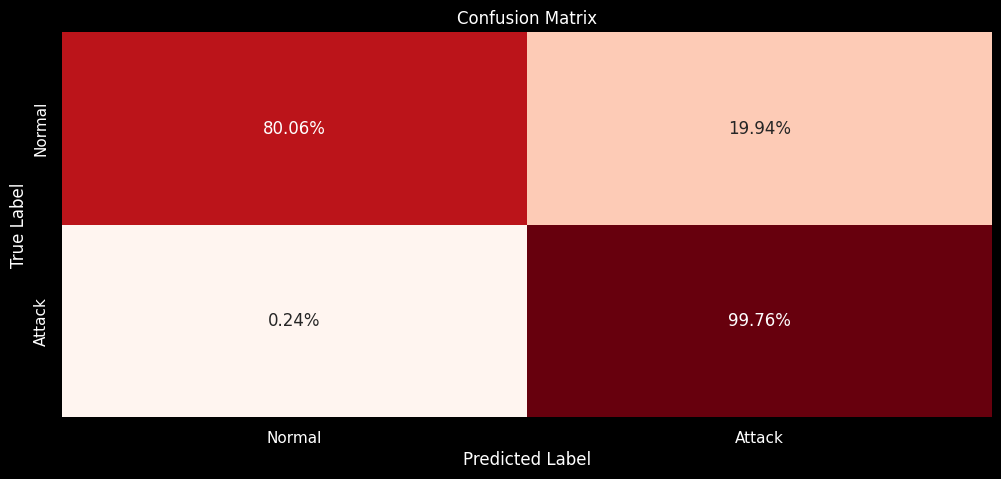

In [209]:
plot_conf_matrix(conf_matrix_best)

# 4.1. strojenie
desc z GPT:
1.1 Co ma sens stroić w MLP (a czego NIE)
🔥 Najważniejsze parametry:

hidden_layer_sizes → pojemność modelu

alpha → regularizacja (bardzo ważne!)

learning_rate_init

max_iter

❌ Czego NIE stroimy (na tym etapie):

solverów (zostaw adam)

aktywacji (relu wystarczy)

bardzo głębokich sieci (to nie deep learning)

📌 MLP łatwo overfituje, więc regularizacja = klucz.

In [210]:
mlp_pipeline = Pipeline(steps=[
    ("preprocessing", ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]), mlp_features)
        ]
    )),
    ("model", MLPClassifier(
        random_state=42,
        solver="adam"
    ))
])


In [211]:
param_dist_mlp = {
    "model__hidden_layer_sizes": [
        (32,),
        (64,),
        (64, 32),
        (128, 64)
    ],
    "model__alpha": [1e-5, 1e-4, 1e-3],
    "model__learning_rate_init": [0.001, 0.01],
    "model__max_iter": [50, 100]
}

In [212]:
# mlp_search.fit(X_train, y_train)

In [213]:
# dump(mlp_search, "mlp_random_search.joblib")

In [214]:
# Load the best pipeline calculated before cuz calculation tooks about 20 minutes
mlp_search = load("mlp_random_search.joblib")

In [ ]:
y_proba_mlp = mlp_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_mlp = (y_proba_mlp >= 0.50).astype(int)

In [ ]:
conf_matrix_best = confusion_matrix(y_test, y_pred_mlp)

display(conf_matrix_best)
metric_pd = calc_metrics(y_pred_mlp, y_test, y_proba_mlp)
metric_pd.index = ['MLP tuned t = 0.50']
finalTable = pd.concat([finalTable, metric_pd])
display(finalTable)

array([[  6136,   1879],
       [    71, 117071]])

accuracy  precision    recall  f1_score   roc_auc  \
LR Baseline            0.762906   0.987287  0.756424  0.856573  0.900184   
LR log                 0.803543   0.987732  0.800038  0.884032  0.917760   
LR tuned log           0.802784   0.987730  0.799218  0.883531  0.917640   
LR tuned log t = 0.40  0.901268   0.985210  0.908146  0.945110  0.917640   
LR tuned log t = 0.20  0.956039   0.973412  0.979794  0.976592  0.917640   
RF base                0.954977   0.995001  0.956702  0.975476  0.987427   
RF t = 0.10            0.986409   0.986998  0.998634  0.992782  0.987427   
RF t = 0.60            0.948153   0.995824  0.948584  0.971630  0.987427   
RF tuned               0.956535   0.994721  0.958648  0.976352  0.981309   
RF tuned t = 0.60      0.949871   0.995344  0.950889  0.972609  0.981309   
RF tuned t = 0.25      0.982734   0.989952  0.991617  0.990784  0.981309   
RF tuned all           0.975423   0.996500  0.977173  0.986742  0.989194   
RF tuned all t = 0.60  0.972610   0.996941  0.973724  0.985196  0.989194   
RF tuned all t = 0.25  0.986505   0.994187  0.991378  0.992781  0.989194   
XGB base               0.948784   0.996049  0.949045  0.971979  0.989682   
XGB t = 0.45           0.954489   0.995668  0.955533  0.975188  0.989682   
XGB t = 0.10           0.986992   0.987656  0.998583  0.993089  0.989682   
XGB tuned              0.951509   0.996025  0.951990  0.973510  0.989451   
XGB tuned t = 0.50     0.951509   0.996025  0.951990  0.973510  0.989451   
XGB t = 0.10           0.986936   0.988422  0.997729  0.993054  0.989451   
MLP t = 0.50           0.985027   0.986511  0.997644  0.992046  0.984047   
MLP tuned t = 0.50     0.984420   0.984203  0.999394  0.991741  0.973578   

                       balanced_accuracy_score  
LR Baseline                           0.807033  
LR log                                0.827405  
LR tuned log                          0.827058  
LR tuned log t = 0.40                 0.854447  
LR tuned log t = 0.20                 0.794326  
RF base                               0.943229  
RF t = 0.10                           0.903185  
RF t = 0.60                           0.945221  
RF tuned                              0.942144  
RF tuned t = 0.60                     0.942943  
RF tuned t = 0.25                     0.922259  
RF tuned all                          0.963509  
RF tuned all t = 0.60                 0.965028  
RF tuned all t = 0.25                 0.953331  
XGB base                              0.947011  
XGB t = 0.45                          0.947386  
XGB t = 0.10                          0.908087  
XGB tuned                             0.948234  
XGB tuned t = 0.50                    0.948234  
XGB t = 0.10                          0.913462  
MLP t = 0.50                          0.899134  
MLP tuned t = 0.50                    0.882479

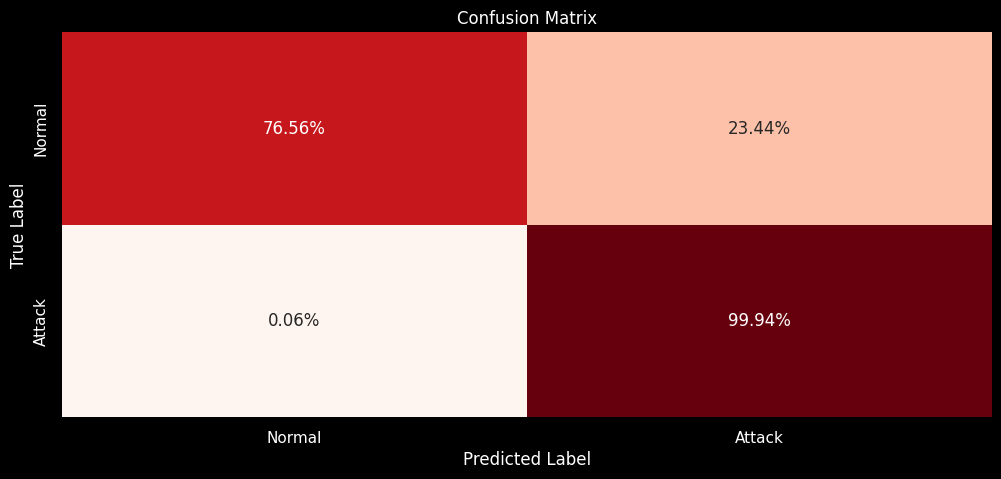

In [217]:
plot_conf_matrix(conf_matrix_best)

In [251]:
### Tresholds

In [237]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_mlp = []

for t in thresholds:
    y_pred_t = (y_proba_mlp >= t).astype(int)
    results_mlp.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1_score": f1_score(y_test, y_pred_t),
        "roc_auc": roc_auc_score(y_test, y_proba_mlp), # roc_auc does not depend on threshold
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

mlp_threshold_df = pd.DataFrame(results_mlp)
mlp_threshold_df



threshold  precision    recall  f1_score   roc_auc  balanced_acc
0        0.10   0.979545  0.999949  0.989642  0.973578      0.847385
1        0.15   0.980340  0.999923  0.990035  0.973578      0.853424
2        0.20   0.980980  0.999906  0.990353  0.973578      0.858281
3        0.25   0.981489  0.999880  0.990600  0.973578      0.862136
4        0.30   0.981720  0.999880  0.990717  0.973578      0.863883
5        0.35   0.983136  0.999787  0.991391  0.973578      0.874566
6        0.40   0.983340  0.999659  0.991432  0.973578      0.876061
7        0.45   0.983974  0.999513  0.991683  0.973578      0.880792
8        0.50   0.984203  0.999394  0.991741  0.973578      0.882479
9        0.55   0.984492  0.999334  0.991858  0.973578      0.884633
10       0.60   0.984663  0.999104  0.991831  0.973578      0.885828
11       0.65   0.984858  0.998839  0.991799  0.973578      0.887192
12       0.70   0.985221  0.998139  0.991638  0.973578      0.889650
13       0.75   0.986210  0.996969  0.991561  0.973578      0.896613
14       0.80   0.986523  0.995424  0.990954  0.973578      0.898336
15       0.85   0.988579  0.979836  0.984189  0.973578      0.907198

In [244]:
# Find best balanced accuracy threshold
best_t = mlp_threshold_df.loc[mlp_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metric_pd = calc_metrics(y_pred_best, y_test, y_proba_mlp)
display(metric_pd)

metric_pd.index = ['MLP tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])



array([[  7755,    260],
       [  5459, 111683]])

accuracy  precision    recall  f1_score   roc_auc  balanced_accuracy_score
0  0.954305   0.997677  0.953398  0.975035  0.973578                  0.96048

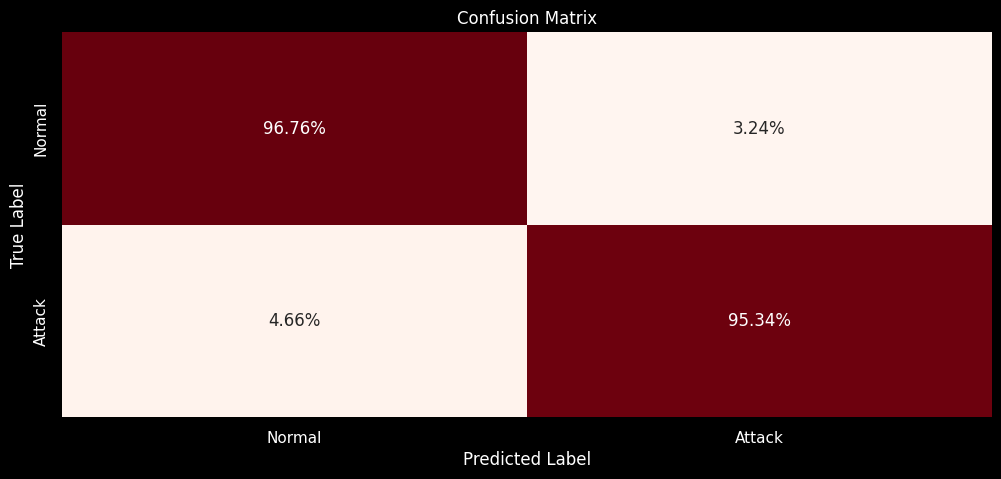

In [245]:
plot_conf_matrix(conf_matrix_best)

In [ ]:
# Find best f1_score threshold
best_t = mlp_threshold_df.loc[mlp_threshold_df['f1_score'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metric_pd = calc_metrics(y_pred_best, y_test, y_proba_mlp)
display(metric_pd)

metric_pd.index = ['MLP tuned t = {:.2f}'.format(best_t)]
finalTable = pd.concat([finalTable, metric_pd])


array([[  7637,    378],
       [  2786, 114356]])

accuracy  precision    recall  f1_score   roc_auc  balanced_accuracy_score
0   0.97472   0.996705  0.976217  0.986355  0.973578                 0.964528

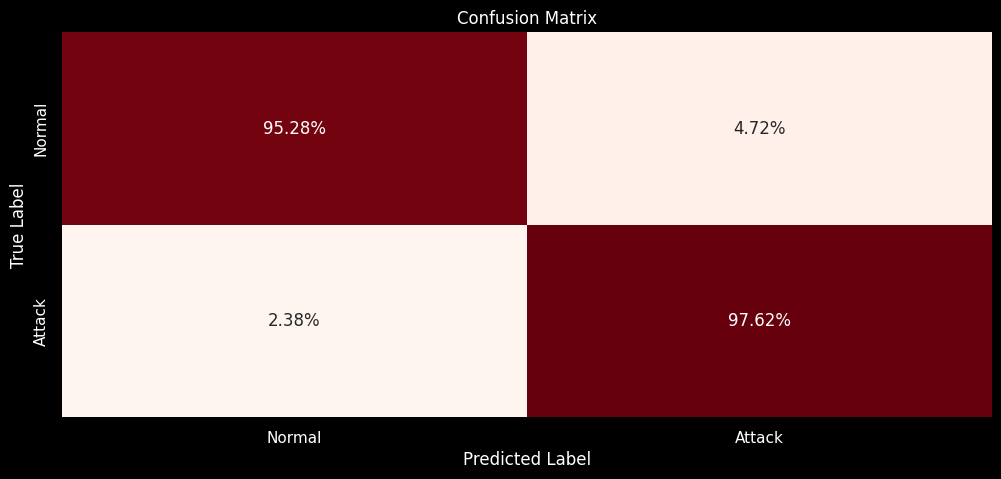

In [248]:
plot_conf_matrix(conf_matrix_best)

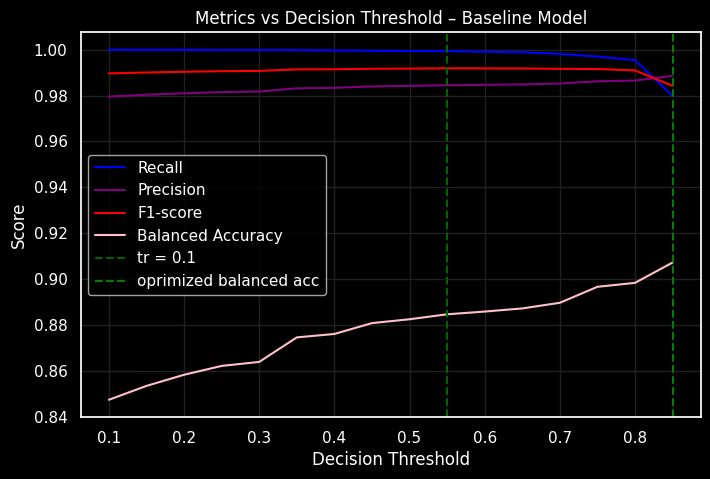

In [250]:


plt.figure(figsize=(8, 5))
plt.plot(mlp_threshold_df['threshold'], mlp_threshold_df['recall'], label='Recall', color = 'blue')
plt.plot(mlp_threshold_df['threshold'], mlp_threshold_df['precision'], label='Precision', color = 'purple')
plt.plot(mlp_threshold_df['threshold'], mlp_threshold_df['f1_score'], label='F1-score', color = 'red')
plt.plot(mlp_threshold_df['threshold'], mlp_threshold_df['balanced_acc'], label='Balanced Accuracy', color = 'pink')

plt.axvline(x=mlp_threshold_df.loc[mlp_threshold_df['f1_score'].idxmax(), 'threshold'], linestyle='--', color='darkgreen', label='tr = 0.1')
plt.axvline(x=mlp_threshold_df.loc[mlp_threshold_df['balanced_acc'].idxmax(), 'threshold'], linestyle='--', color='green', label='oprimized balanced acc')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()



### Variable Importance

In [219]:
from lime.lime_tabular import LimeTabularExplainer

In [220]:
explainer = LimeTabularExplainer(
    training_data=np.array(X_train[mlp_features]),
    feature_names=mlp_features,
    class_names=['Normal', 'Anomaly'],
    mode='classification',
    discretize_continuous=True
)

In [228]:
from IPython.display import display
i = 9254  # indeks próbki z X_test

exp = explainer.explain_instance(
    data_row=X_test.iloc[i][mlp_features].values,
    predict_fn=lambda x: mlp_search.predict_proba(pd.DataFrame(x, columns=mlp_features)),
    num_features=8
)

# exp.show_in_notebook()
print(exp.as_list())
# display(exp)
exp.save_to_file("lime_explanation_mlp.html")

[('Active_Mean <= 0.00', -0.13517838237366286), ('Flow_Byts/s > 20689655.17', 0.11942735058764607), ('73.00 < Idle_Mean <= 93.50', 0.0862051795958633), ('Tot_Bwd_Pkts > 2.00', -0.07852702002674355), ('Flow_IAT_Std <= 0.00', -0.07678898852264457), ('Fwd_Bwd_Asymetry <= -1.10', -0.05802480693213145), ('131.00 < Flow_Duration <= 221.00', -0.049118487371751125), ('96.67 < Pkt_Len_Mean <= 1388.00', -0.04408001585946473)]


In [229]:
def plot_lime_explanation(exp, title="LIME explanation – MLP (local)"):
    """
    Plot LIME explanation as a horizontal bar chart
    consistent with dark theme used in histogram plots.
    
    input:
        exp – LIME explanation object (from exp.as_list())
    """

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Convert LIME output to DataFrame
    lime_df = pd.DataFrame(exp.as_list(), columns=["feature", "impact"])
    lime_df = lime_df.sort_values("impact")

    # Set dark theme (consistent with your histograms)
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })

    # Colors: red = anomaly, blue = normal
    colors = lime_df["impact"].apply(lambda x: "red" if x > 0 else "dodgerblue")

    # Plot
    plt.figure(figsize=(10, 4))
    plt.barh(lime_df["feature"], lime_df["impact"], color=colors)
    plt.axvline(0, color="white", linewidth=0.8, linestyle="--")

    plt.title(title)
    plt.xlabel("Impact on anomaly prediction")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


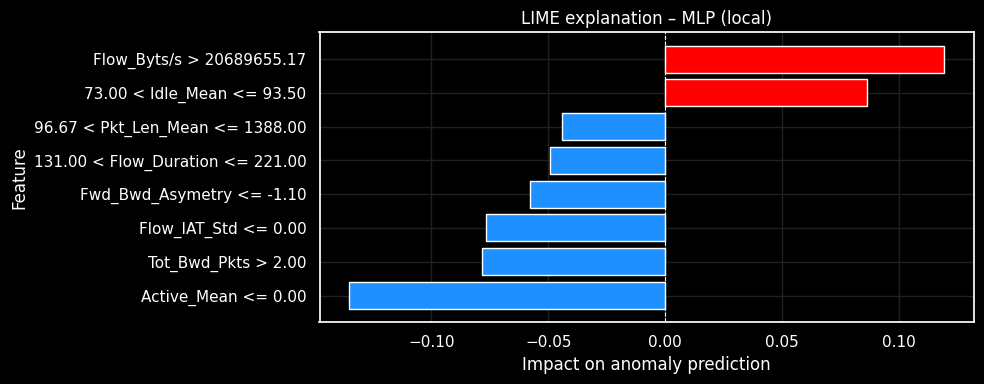

In [230]:
plot_lime_explanation(exp)

### Results:
* Local neural network interpretation for a single observation, in this case a randomly selected observation with idx = 9254 obtained using LIME. The horizontal axis shows the impact of individual observations on attack prediction - Red + for anomalous, Blue + for normal.
